In [1]:
break_flag = True
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"
#exec(open('Current_model.py').read())
%run -i Current_model_lib
%run -i Train_current_model
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: havent_invented (use `wandb login --relogin` to force relogin)


NameError: name 'args_p' is not defined

In [2]:
%run -i Codecs_validation
import wandb


In [3]:
#TODO MAD CW_SSIM NLPD VSI FSIM
#from piq import IS, FID, GS, KID, MSID, PR
from piq import HaarPSILoss,VIFLoss, DSSLoss,dss, multi_scale_ssim, multi_scale_gmsd,vif, vif_p,MDSILoss, GMSDLoss,VSILoss,SRSIMLoss
from IQA_pytorch import GMSD, VIF, VIFs, MS_SSIM, SSIM
from piq import DISTS as piq_DISTS
from piq import LPIPS as piq_LPIPS
to_train = True

self.GMSD_loss_1 = GMSD()
self.iqa_vifs_loss = VIFs()    
self.iqa_vif_loss = VIF()
self.piq_vif_Loss = VIFLoss()
self.piq_vif_p_loss = vif_p
self.dss_loss_1 = DSSLoss()
self.dss_loss_2 = dss
self.msssim_1_loss = multi_scale_ssim
self.haarpsi_loss = HaarPSILoss()
self.msssim_2 = MS_SSIM()
self.ms_gmsd_loss = multi_scale_gmsd
self.SRSIM_loss = SRSIMLoss()
self.VSI_loss = VSILoss()
self.GMSD_loss_2 = GMSDLoss()
self.MDSI_met = MDSILoss()
self.ssim_loss = SSIM()
self.DISTS_loss_2 = piq_DISTS()
self.LPIPS_loss_2 = piq_LPIPS()


In [8]:
X_sample = X_sample.requires_grad_().to(device)
lst_direction = []
met_lst = ["PieAPP","SSIM", "DISTS","LPIPS", "GMSD","GMSD1","VIFs","VIF","VIFLoss","VIFp","DSS","DSS1","MS-SSIM","HaarPSI","MS-SSIM","MS-GMSD","SRSIM","VSI","MDSI","DISTS1","LPIPS1"]
for tar_met in met_lst:
    loss_calc = Custom_enh_Loss(target_lst = [tar_met])
    loss_calc.eval()
    loss_calc = loss_calc.requires_grad_(True).to(device)
    
    ls = loss_calc({"x_hat" :X_sample}, X_sample)
    ls1 = list(ls.items())[2][1]
    
    ls = loss_calc({"x_hat" :X_sample - X_sample}, X_sample)
    ls2 = list(ls.items())[2][1]
    lst_direction.append(ls1.item() > ls2.item())
    print(list(zip(met_lst, lst_direction)))
    print(ls1.item() == ls2.item())

[('PieAPP', False)]
False
[('PieAPP', False), ('SSIM', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False), ('VIFLoss', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', Fal

In [30]:
device = "cuda:0"
X_sample = X_sample.to(device).requires_grad_()

loss = LPIPS()
loss = loss.requires_grad_(True)
loss.requires_grad = True
loss.eval()
X_sample = X_sample.to(device)
loss = loss.to(device)
#with torch.enable_grad():
ls = loss(X_sample, X_sample)
ls

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)

In [23]:
torch.rfft = torch.fft.rfft
loss_calc = Custom_enh_Loss(target_lst = ["LPIPS"])#PieAPP DISTS LPIPS
X_sample = X_sample.to(device)
loss_calc({"x_hat" : X_sample}, X_sample)

{'mse_loss': tensor(0., device='cuda:0'),
 'PSNR': tensor(inf, device='cuda:0'),
 'LPIPS': tensor(0., device='cuda:0'),
 'loss': tensor(0., device='cuda:0')}

In [3]:


#for vid, Log_cur in zip(sorted(os.listdir(dst_dir)), Log_1):
#    RD_curves_plot(Log_cur,videoname=vid, save_pgf = False, save_png = False, fig_file = "./vis/RD_curves1/" + vid)

In [20]:
codec_compressor = codec_outer_compress("R:/home_dir/", " -c:v mjpeg -q:v 1 ")
codec_compressor()
print(codec_compressor.get_bitrate())
#logs_plot_cur['bitrate'] = codec_compressor.get_bitrate()
#logs_plot_cur

102.283965


In [9]:
codec_compressor.get_bitrate()

102.366671

In [ ]:
"model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt"
"model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt"
"model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt"

In [3]:
get_met_names(directory='./models_enhancement_FR/',key= lambda x: "model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt" in x or "model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt" in x or "model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt" in x, force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']])[0]

NameError: name 'get_met_names' is not defined

In [ ]:
 #a0= model_dirs_full, model_dirs_full, model_names = get_met_names(key= lambda x: "2000mse" in x and 
        #                                                                     "cheng2020_attn_quality2" in x and 
        #                                                                     'quality5' not in x and (('fixed_direction' in x) or 
        #                                                                                              "MDTVSFA_2000m" in x))
        
        #a0 = [a0[0][1:], a0[1][1:], a0[2][1:]]
        #a1 = get_met_names(key= lambda x: "model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_direction.ckpt" in x)
        #a2 = get_met_names(directory='./models_enhancement/0403/', key= lambda x: "" in x)
        #model_dirs_full, model_target_met_names, model_names = [a0[0] + a1[0] + a2[0], a0[1] + a1[1] + a2[1],a0[2] +  a1[2] + a2[2]]
        #model_dirs_full, model_target_met_names, model_names = model_dirs_full, model_target_met_names, model_names

In [3]:
force_names = ["model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt","model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt",
"model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt"]
force_names = ['./models_enhancement_FR/' + i for i in force_names], ["DISTS", "LPIPS", "LPIPS1"], force_names
force_names

(['./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt'],
 ['DISTS', 'LPIPS', 'LPIPS1'],
 ['model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt',
  'model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt',
  'model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt'])

In [ ]:
"""force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']]"""

In [4]:
from compressai.zoo import cheng2020_attn
device_met = "cuda:0"
device_enh = "cuda:0"
device_sub = "cpu"
num_frames = 6
#net_codec = cheng2020_attn(quality=3, pretrained=True).to(device_met).requires_grad_(True)

In [5]:
codecs_all_neural = [cheng2020_attn(quality=1, pretrained=True,device = device_sub),cheng2020_attn(quality=3, pretrained=True,device = device_sub), cheng2020_attn(quality=4, pretrained=True,device = device_sub), cheng2020_attn(quality=6, pretrained=True,device = device_sub),]
codecs_all_motion = [" -c:v mjpeg -q:v 1 "," -c:v mjpeg -q:v 2 ", " -c:v mjpeg -q:v 3 ", " -c:v mjpeg -q:v 5 ", " -c:v mjpeg -q:v 7 ", " -c:v mjpeg -q:v 9 "]
codecs_all_test = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 3M "]
codecs_all_h264 = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 200k ",
                   " -vcodec libx264   -preset:v medium -b:v 300k ",
                   " -vcodec libx264   -preset:v medium -b:v 500k ",
                   " -vcodec libx264   -preset:v medium -b:v 1M ",
                   " -vcodec libx264   -preset:v medium -b:v 2M ",
                   " -vcodec libx264   -preset:v medium -b:v 3M ",
                   " -vcodec libx264   -preset:v medium -b:v 5M ",
                   " -vcodec libx264   -preset:v medium -b:v 7M "
                   " -vcodec libx264   -preset:v medium -b:v 9M ",
                   " -vcodec libx264   -preset:v medium -b:v 12M "]
codecs_all_neural_2 = [cheng2020_attn(quality=3, pretrained=True), cheng2020_attn(quality=6, pretrained=True)]
codecs_all_motion_1 = [" -c:v mjpeg -q:v 3 "]
codecs_all_h264_3 = [ " -vcodec libx264   -preset:v medium -b:v 3M ",]

In [6]:
#FR
for to_crop in [True, False]:
    for Identity_flag in [False, True]:
        for codecs_all, codec_type in zip([codecs_all_motion_1, codecs_all_h264_3,codecs_all_neural_2], [ "motion", "h264","neural"]):
            try:
                model_dirs_full, model_target_met_names, model_names = force_names#get_met_names(directory='./models_enhancement_FR/',key= lambda x: "model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt" in x or "model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt" in x or "model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt" in x, force_names = )
                net_enhances = load_models(model_dirs_full)
                
                device_met = "cuda:0"
                device_enh = "cuda:0"
                device_sub = "cpu"
                num_frames = 64
                
                batch_sz = 2
                Log_1 = []
                model_target_met_names = [i if i != "PAC2PIC" else "PAC2PIQ" for i in model_target_met_names]
                if Identity_flag:
                    model_target_met_names = np.unique(model_target_met_names)
                wandb.init(project="Whitebox_strong_metrics_attacks", entity="havent_invented", name="RD_curves_all_met_18_03" + ("Without Preprocessing" if Identity_flag else "With Preprocessing"),
                           tags = {"RD curves", ("Without Preprocessing" if Identity_flag else "With Preprocessing")}, save_code = True)  
                wandb.config.update({"codecs": codecs_all, 
                                     "Target Metrics": model_target_met_names,
                                     "full_model_dirs" : model_dirs_full,
                                     "num_frames" : num_frames, 
                                     "No preprocessing" : Identity_flag,
                                    "codecs": [str(i) for i in codecs_all],
                                     "to_crop": to_crop,
                                     "codec_type": codec_type
                                    })
                for idxf, file in tqdm(enumerate(os.listdir(dst_dir))):
                    Log_2 = []
                    for model,met_name,fil_name_1 in tqdm(zip(net_enhances, model_target_met_names, model_dirs_full)):
                        if met_name == "VSFA":
                            batch_sz = 2
                        else:
                            batch_sz = 1#2
                        if met_name == "Linearity":
                            deivce_main = "cuda:0"
                        else:
                            deivce_main = "cuda:0"
                        torch.cuda.empty_cache()
                        with torch.no_grad():
                            try:
                                f_name = met_name + " " +  file + (" without" if Identity_flag else " with") + " preprocessing" 
                                print(met_name, fil_name_1)
                                try:
                                    del loss_calc
                                except Exception:
                                    pass
                                loss_calc = Custom_enh_Loss(target_lst=['mse', met_name], to_train = False, crop_NIMA = False)
                                loss_calc = loss_calc.to('cpu')
                                ful_name = dst_dir + file
                                home_dir = "R:/home_dir/"
                                #dataset_test = Video_reader_dataset(name1 = ful_name, num_frames= 64, minimal_batch_sz = 2)#
                                #dataset_test = DataLoader(dataset_test, batch_size= batch_sz, shuffle = False)
                                Log_3 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],codecs = codecs_all,
                                                    vid_full_dir = ful_name, to_crop = to_crop, loss_f = loss_calc)
                                table = wandb.Table(columns= list(Log_3[0].keys()), data = [list(Log_3[0].values())])
                                wandb.log({f_name: table}) 
                                print(Log_3)
                                Log_2.append(Log_3)
                            except Exception as exc:
                                #raise
                                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)
                                print("Exception in " + met_name)
                                
                    Log_1.append(Log_2)
                    if 1:
                        np.save("./Logs_rd_curves/netcodec_" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "") + ".npy", Log_1)
                    
                wandb.finish()
                print(Log_1)
            except Exception:
                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0it [00:00, ?it/s]

[{'mse': [0.02498469], 'bpp_loss': [0.6834721], 'loss_classic': [16.929766], 'PSNR': [16.030905], 'DISTS': [0.27905014], 'loss': [558.12524], 'bitrate': [1.585996]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0039160335], 'bpp_loss': [0.6834721], 'loss_classic': [3.229873], 'PSNR': [24.086205], 'LPIPS': [0.133692], 'loss': [267.38788], 'bitrate': [2.645603]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.013352197], 'bpp_loss': [0.6834721], 'loss_classic': [9.365738], 'PSNR': [18.750689], 'LPIPS1': [0.25786608], 'loss': [515.7455], 'bitrate': [1.578312]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0058863023], 'bpp_loss': [0.6834721], 'loss_classic': [4.51104], 'PSNR': [23.502335], 'DISTS': [0.29983225], 'loss': [599.6704], 'bitrate': [1.111071]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0030386331], 'bpp_loss': [0.6834721], 'loss_classic': [2.6593432], 'PSNR': [25.580944], 'LPIPS': [0.20268092], 'loss': [405.36487], 'bitrate': [1.7766]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.002892774], 'bpp_loss': [0.6834721], 'loss_classic': [2.5644984], 'PSNR': [28.045826], 'LPIPS1': [0.22950587], 'loss': [459.01462], 'bitrate': [1.017443]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0034823664], 'bpp_loss': [0.6834721], 'loss_classic': [2.947881], 'PSNR': [24.97339], 'DISTS': [0.2589637], 'loss': [517.9309], 'bitrate': [0.709443]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003303963], 'bpp_loss': [0.6834721], 'loss_classic': [2.8318741], 'PSNR': [24.888773], 'LPIPS': [0.29317483], 'loss': [586.3529], 'bitrate': [0.955218]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0008943352], 'bpp_loss': [0.6834721], 'loss_classic': [1.2650136], 'PSNR': [31.184658], 'LPIPS1': [0.2847874], 'loss': [569.5757], 'bitrate': [0.5989]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0053597167], 'bpp_loss': [0.6834721], 'loss_classic': [4.1686277], 'PSNR': [22.70889], 'DISTS': [0.22735396], 'loss': [454.71326], 'bitrate': [2.070215]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0034152414], 'bpp_loss': [0.6834721], 'loss_classic': [2.9042327], 'PSNR': [24.67044], 'LPIPS': [0.14599587], 'loss': [291.99518], 'bitrate': [4.20764]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0017142113], 'bpp_loss': [0.6834721], 'loss_classic': [1.798138], 'PSNR': [27.660849], 'LPIPS1': [0.14821541], 'loss': [296.43253], 'bitrate': [3.491453]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.008453488], 'bpp_loss': [0.6834721], 'loss_classic': [6.180353], 'PSNR': [21.115177], 'DISTS': [0.27489248], 'loss': [549.7934], 'bitrate': [2.123637]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0043561608], 'bpp_loss': [0.6834721], 'loss_classic': [3.5160658], 'PSNR': [23.717419], 'LPIPS': [0.1590197], 'loss': [318.04376], 'bitrate': [4.493184]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0021503908], 'bpp_loss': [0.6834721], 'loss_classic': [2.0817637], 'PSNR': [27.006039], 'LPIPS1': [0.18871829], 'loss': [377.43878], 'bitrate': [3.81044]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0032859808], 'bpp_loss': [0.6834721], 'loss_classic': [2.8201811], 'PSNR': [24.973888], 'DISTS': [0.24486062], 'loss': [489.72455], 'bitrate': [1.122859]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003396187], 'bpp_loss': [0.6834721], 'loss_classic': [2.8918428], 'PSNR': [24.762022], 'LPIPS': [0.2577967], 'loss': [515.5968], 'bitrate': [2.210162]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011654587], 'bpp_loss': [0.6834721], 'loss_classic': [1.4413116], 'PSNR': [29.429432], 'LPIPS1': [0.35398966], 'loss': [707.98047], 'bitrate': [1.175681]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020393976], 'bpp_loss': [0.6834721], 'loss_classic': [2.0095904], 'PSNR': [26.906044], 'DISTS': [0.1793275], 'loss': [358.65704], 'bitrate': [1.669303]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003209941], 'bpp_loss': [0.6834721], 'loss_classic': [2.7707362], 'PSNR': [24.937443], 'LPIPS': [0.1612215], 'loss': [322.44623], 'bitrate': [2.936053]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0010572481], 'bpp_loss': [0.6834721], 'loss_classic': [1.3709477], 'PSNR': [29.779663], 'LPIPS1': [0.17878145], 'loss': [357.56396], 'bitrate': [1.910153]}]



[[[{'mse': [0.02498469], 'bpp_loss': [0.6834721], 'loss_classic': [16.929766], 'PSNR': [16.030905], 'DISTS': [0.27905014], 'loss': [558.12524], 'bitrate': [1.585996]}], [{'mse': [0.0039160335], 'bpp_loss': [0.6834721], 'loss_classic': [3.229873], 'PSNR': [24.086205], 'LPIPS': [0.133692], 'loss': [267.38788], 'bitrate': [2.645603]}], [{'mse': [0.013352197], 'bpp_loss': [0.6834721], 'loss_classic': [9.365738], 'PSNR': [18.750689], 'LPIPS1': [0.25786608], 'loss': [515.7455], 'bitrate': [1.578312]}]], [[{'mse': [0.0058863023], 'bpp_loss': [0.6834721], 'loss_classic': [4.51104], 'PSNR': [23.502335], 'DISTS': [0.29983225], 'loss': [599.6704], 'bitrate': [1.111071]}], [{'mse': [0.0030386331], 'bpp_loss': [0.6834721], 'loss_classic': [2.6593432], 'PSNR': [25.580944], 'LPIPS': [0.20268092], 'loss': [405.36487], 'bitrate': [1.7766]}], [{'mse': [0.002892774], 'bpp_loss': [0.6834721], 'loss_classic': [2.5644984], 'PSNR': [28.045826], 'LPIPS1': [0.22950587], 'loss': [459.01462], 'bitrate': [1.01744

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.024991903], 'bpp_loss': [0.6834721], 'loss_classic': [16.934456], 'PSNR': [16.029724], 'DISTS': [0.2794363], 'loss': [558.8976], 'bitrate': [2.750846]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003956113], 'bpp_loss': [0.6834721], 'loss_classic': [3.2559345], 'PSNR': [24.041973], 'LPIPS': [0.13017996], 'loss': [260.3639], 'bitrate': [3.218465]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.013326948], 'bpp_loss': [0.6834721], 'loss_classic': [9.349319], 'PSNR': [18.758734], 'LPIPS1': [0.22631681], 'loss': [452.6469], 'bitrate': [3.009162]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0058743116], 'bpp_loss': [0.6834721], 'loss_classic': [4.5032425], 'PSNR': [23.511692], 'DISTS': [0.3241194], 'loss': [648.2446], 'bitrate': [2.815812]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0030640461], 'bpp_loss': [0.6834721], 'loss_classic': [2.675868], 'PSNR': [25.54842], 'LPIPS': [0.21096556], 'loss': [421.93417], 'bitrate': [3.060025]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0028460692], 'bpp_loss': [0.6834721], 'loss_classic': [2.5341287], 'PSNR': [28.195412], 'LPIPS1': [0.18887195], 'loss': [377.74673], 'bitrate': [2.9024]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0034772307], 'bpp_loss': [0.6834721], 'loss_classic': [2.9445412], 'PSNR': [24.980734], 'DISTS': [0.27646533], 'loss': [552.93414], 'bitrate': [2.839062]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003320944], 'bpp_loss': [0.6834721], 'loss_classic': [2.842916], 'PSNR': [24.865654], 'LPIPS': [0.3240698], 'loss': [648.14294], 'bitrate': [2.950312]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00089164823], 'bpp_loss': [0.6834721], 'loss_classic': [1.2632663], 'PSNR': [31.206581], 'LPIPS1': [0.24593803], 'loss': [491.87692], 'bitrate': [2.859384]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.005223914], 'bpp_loss': [0.6834721], 'loss_classic': [4.0803223], 'PSNR': [22.820414], 'DISTS': [0.22868165], 'loss': [457.36856], 'bitrate': [2.625518]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003450804], 'bpp_loss': [0.6834721], 'loss_classic': [2.9273574], 'PSNR': [24.625027], 'LPIPS': [0.1393512], 'loss': [278.70584], 'bitrate': [3.046593]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.001568735], 'bpp_loss': [0.6834721], 'loss_classic': [1.7035421], 'PSNR': [28.048319], 'LPIPS1': [0.12440544], 'loss': [248.81245], 'bitrate': [3.005743]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00832328], 'bpp_loss': [0.6834721], 'loss_classic': [6.095685], 'PSNR': [21.177246], 'DISTS': [0.27532014], 'loss': [550.6486], 'bitrate': [2.730718]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004411584], 'bpp_loss': [0.6834721], 'loss_classic': [3.552105], 'PSNR': [23.661621], 'LPIPS': [0.15527803], 'loss': [310.5605], 'bitrate': [3.258396]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020414663], 'bpp_loss': [0.6834721], 'loss_classic': [2.0109355], 'PSNR': [27.266964], 'LPIPS1': [0.14752811], 'loss': [295.05826], 'bitrate': [3.219015]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0032655853], 'bpp_loss': [0.6834721], 'loss_classic': [2.8069189], 'PSNR': [25.00002], 'DISTS': [0.25675106], 'loss': [513.5054], 'bitrate': [2.809815]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003421149], 'bpp_loss': [0.6834721], 'loss_classic': [2.9080744], 'PSNR': [24.728632], 'LPIPS': [0.2615153], 'loss': [523.03394], 'bitrate': [3.173153]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011003888], 'bpp_loss': [0.6834721], 'loss_classic': [1.3989999], 'PSNR': [29.68356], 'LPIPS1': [0.25866103], 'loss': [517.3231], 'bitrate': [3.049234]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.002009802], 'bpp_loss': [0.6834721], 'loss_classic': [1.9903458], 'PSNR': [26.969791], 'DISTS': [0.188077], 'loss': [376.156], 'bitrate': [2.681778]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003272151], 'bpp_loss': [0.6834721], 'loss_classic': [2.8111882], 'PSNR': [24.854195], 'LPIPS': [0.15909865], 'loss': [318.20056], 'bitrate': [3.040218]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0009828748], 'bpp_loss': [0.6834721], 'loss_classic': [1.3225865], 'PSNR': [30.10077], 'LPIPS1': [0.13137338], 'loss': [262.74774], 'bitrate': [2.913625]}]



[[[{'mse': [0.024991903], 'bpp_loss': [0.6834721], 'loss_classic': [16.934456], 'PSNR': [16.029724], 'DISTS': [0.2794363], 'loss': [558.8976], 'bitrate': [2.750846]}], [{'mse': [0.003956113], 'bpp_loss': [0.6834721], 'loss_classic': [3.2559345], 'PSNR': [24.041973], 'LPIPS': [0.13017996], 'loss': [260.3639], 'bitrate': [3.218465]}], [{'mse': [0.013326948], 'bpp_loss': [0.6834721], 'loss_classic': [9.349319], 'PSNR': [18.758734], 'LPIPS1': [0.22631681], 'loss': [452.6469], 'bitrate': [3.009162]}]], [[{'mse': [0.0058743116], 'bpp_loss': [0.6834721], 'loss_classic': [4.5032425], 'PSNR': [23.511692], 'DISTS': [0.3241194], 'loss': [648.2446], 'bitrate': [2.815812]}], [{'mse': [0.0030640461], 'bpp_loss': [0.6834721], 'loss_classic': [2.675868], 'PSNR': [25.54842], 'LPIPS': [0.21096556], 'loss': [421.93417], 'bitrate': [3.060025]}], [{'mse': [0.0028460692], 'bpp_loss': [0.6834721], 'loss_classic': [2.5341287], 'PSNR': [28.195412], 'LPIPS1': [0.18887195], 'loss': [377.74673], 'bitrate': [2.902

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.025214061, 0.025139244], 'bpp_loss': [0.23041785, 0.469162], 'loss_classic': [16.625862, 16.815956], 'PSNR': [15.991732, 16.004507], 'loss': [0.025214061, 0.025139244]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004354692, 0.004612311], 'bpp_loss': [0.33603784, 0.9227921], 'loss_classic': [3.1676764, 3.9219475], 'PSNR': [23.625267, 23.374012], 'loss': [0.004354692, 0.004612311]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.013609586, 0.013457276], 'bpp_loss': [0.19553427, 0.475437], 'loss_classic': [9.045168, 9.22603], 'PSNR': [18.667366, 18.716137], 'loss': [0.013609586, 0.013457276]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0062342943, 0.006256292], 'bpp_loss': [0.17771693, 0.3621606], 'loss_classic': [4.231567, 4.4303145], 'PSNR': [23.188717, 23.134802], 'loss': [0.0062342943, 0.006256292]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0036468788, 0.0036806725], 'bpp_loss': [0.24303472, 0.6722896], 'loss_classic': [2.6144176, 3.0656471], 'PSNR': [24.629663, 24.626514], 'loss': [0.0036468788, 0.0036806725]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0027696295, 0.0026570866], 'bpp_loss': [0.14972132, 0.3472334], 'loss_classic': [1.9506729, 2.0750039], 'PSNR': [28.44273, 28.786589], 'loss': [0.0027696295, 0.0026570866]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0035711618, 0.0035794242], 'bpp_loss': [0.11632115, 0.20878607], 'loss_classic': [2.438469, 2.5363069], 'PSNR': [24.84873, 24.839424], 'loss': [0.0035711618, 0.0035794242]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00380763, 0.003889862], 'bpp_loss': [0.11833289, 0.26033372], 'loss_classic': [2.594244, 2.7897162], 'PSNR': [24.259626, 24.166515], 'loss': [0.00380763, 0.003889862]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0008520103, 0.0008419487], 'bpp_loss': [0.10772404, 0.18535759], 'loss_classic': [0.6617437, 0.73283476], 'PSNR': [31.488937, 31.536], 'loss': [0.0008520103, 0.0008419487]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0057911263, 0.005445391], 'bpp_loss': [0.30087873, 0.62234783], 'loss_classic': [4.0665584, 4.163213], 'PSNR': [22.372787, 22.640022], 'loss': [0.0057911263, 0.005445391]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004218674, 0.0039839516], 'bpp_loss': [0.6656755, 1.5218961], 'loss_classic': [3.4088683, 4.1124606], 'PSNR': [23.752699, 24.001282], 'loss': [0.004218674, 0.0039839516]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020669857, 0.0014454381], 'bpp_loss': [0.44853437, 1.1442704], 'loss_classic': [1.7925918, 2.0841665], 'PSNR': [26.84719, 28.401445], 'loss': [0.0020669857, 0.0014454381]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0092035495, 0.008664829], 'bpp_loss': [0.31498203, 0.65614307], 'loss_classic': [6.2995906, 6.290448], 'PSNR': [20.747295, 20.985916], 'loss': [0.0092035495, 0.008664829]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0057283593, 0.0051871454], 'bpp_loss': [0.7356447, 1.6146121], 'loss_classic': [4.46051, 4.9875536], 'PSNR': [22.559715, 22.952442], 'loss': [0.0057283593, 0.0051871454]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0030370606, 0.0021079928], 'bpp_loss': [0.5681438, 1.2962956], 'loss_classic': [2.5429924, 2.667018], 'PSNR': [25.56216, 27.073555], 'loss': [0.0030370606, 0.0021079928]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0034776337, 0.0035069892], 'bpp_loss': [0.15619652, 0.31913525], 'loss_classic': [2.4175277, 2.5995548], 'PSNR': [24.70456, 24.662863], 'loss': [0.0034776337, 0.0035069892]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003783546, 0.0038993298], 'bpp_loss': [0.19847278, 0.7392416], 'loss_classic': [2.6587236, 3.2747808], 'PSNR': [24.27686, 24.147991], 'loss': [0.003783546, 0.0038993298]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0009987158, 0.0009402132], 'bpp_loss': [0.14104445, 0.3020102], 'loss_classic': [0.7904594, 0.91338384], 'PSNR': [30.130558, 30.372927], 'loss': [0.0009987158, 0.0009402132]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0022268402, 0.002152475], 'bpp_loss': [0.23731898, 0.49732757], 'loss_classic': [1.6853218, 1.8969743], 'PSNR': [26.5237, 26.671368], 'loss': [0.0022268402, 0.002152475]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003694152, 0.0037849112], 'bpp_loss': [0.3926503, 1.0157411], 'loss_classic': [2.7947724, 3.4768796], 'PSNR': [24.32709, 24.221779], 'loss': [0.003694152, 0.0037849112]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0009814128, 0.0007760239], 'bpp_loss': [0.21270296, 0.568089], 'loss_classic': [0.8508667, 1.0726986], 'PSNR': [30.099026, 31.133432], 'loss': [0.0009814128, 0.0007760239]}]



[[[{'mse': [0.025214061, 0.025139244], 'bpp_loss': [0.23041785, 0.469162], 'loss_classic': [16.625862, 16.815956], 'PSNR': [15.991732, 16.004507], 'loss': [0.025214061, 0.025139244]}], [{'mse': [0.004354692, 0.004612311], 'bpp_loss': [0.33603784, 0.9227921], 'loss_classic': [3.1676764, 3.9219475], 'PSNR': [23.625267, 23.374012], 'loss': [0.004354692, 0.004612311]}], [{'mse': [0.013609586, 0.013457276], 'bpp_loss': [0.19553427, 0.475437], 'loss_classic': [9.045168, 9.22603], 'PSNR': [18.667366, 18.716137], 'loss': [0.013609586, 0.013457276]}]], [[{'mse': [0.0062342943, 0.006256292], 'bpp_loss': [0.17771693, 0.3621606], 'loss_classic': [4.231567, 4.4303145], 'PSNR': [23.188717, 23.134802], 'loss': [0.0062342943, 0.006256292]}], [{'mse': [0.0036468788, 0.0036806725], 'bpp_loss': [0.24303472, 0.6722896], 'loss_classic': [2.6144176, 3.0656471], 'PSNR': [24.629663, 24.626514], 'loss': [0.0036468788, 0.0036806725]}], [{'mse': [0.0027696295, 0.0026570866], 'bpp_loss': [0.14972132, 0.3472334], 

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'DISTS': [0.035524484], 'loss': [71.04909], 'bitrate': [1.494759]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'LPIPS': [0.068371266], 'loss': [136.74265], 'bitrate': [1.494759]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'LPIPS1': [0.068371266], 'loss': [136.74265], 'bitrate': [1.494759]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'DISTS': [0.053958982], 'loss': [107.91806], 'bitrate': [0.985618]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'LPIPS': [0.093850434], 'loss': [187.70096], 'bitrate': [0.985618]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'LPIPS1': [0.093850434], 'loss': [187.70096], 'bitrate': [0.985618]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [4.695787e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7140064], 'PSNR': [43.302544], 'DISTS': [0.07444383], 'loss': [148.8877], 'bitrate': [0.492815]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [4.695787e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7140064], 'PSNR': [43.302544], 'LPIPS': [0.13644895], 'loss': [272.89792], 'bitrate': [0.492815]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [4.695787e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7140064], 'PSNR': [43.302544], 'LPIPS1': [0.13644893], 'loss': [272.89792], 'bitrate': [0.492815]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0004321125], 'bpp_loss': [0.6834721], 'loss_classic': [0.9644532], 'PSNR': [33.64428], 'DISTS': [0.036581732], 'loss': [73.163895], 'bitrate': [4.015162]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0004321125], 'bpp_loss': [0.6834721], 'loss_classic': [0.9644532], 'PSNR': [33.64428], 'LPIPS': [0.07214713], 'loss': [144.29468], 'bitrate': [4.015162]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0004321125], 'bpp_loss': [0.6834721], 'loss_classic': [0.9644532], 'PSNR': [33.64428], 'LPIPS1': [0.07214713], 'loss': [144.29468], 'bitrate': [4.015162]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00044826884], 'bpp_loss': [0.6834721], 'loss_classic': [0.9749589], 'PSNR': [33.671997], 'DISTS': [0.0503228], 'loss': [100.64606], 'bitrate': [4.54584]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00044826884], 'bpp_loss': [0.6834721], 'loss_classic': [0.9749589], 'PSNR': [33.671997], 'LPIPS': [0.09816249], 'loss': [196.32541], 'bitrate': [4.54584]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00044826884], 'bpp_loss': [0.6834721], 'loss_classic': [0.9749589], 'PSNR': [33.671997], 'LPIPS1': [0.09816249], 'loss': [196.32541], 'bitrate': [4.54584]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0001288532], 'bpp_loss': [0.6834721], 'loss_classic': [0.7672589], 'PSNR': [38.995926], 'DISTS': [0.10804888], 'loss': [216.0979], 'bitrate': [1.075834]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0001288532], 'bpp_loss': [0.6834721], 'loss_classic': [0.7672589], 'PSNR': [38.995926], 'LPIPS': [0.19604024], 'loss': [392.08063], 'bitrate': [1.075834]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0001288532], 'bpp_loss': [0.6834721], 'loss_classic': [0.7672589], 'PSNR': [38.995926], 'LPIPS1': [0.19604024], 'loss': [392.08063], 'bitrate': [1.075834]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00016144585], 'bpp_loss': [0.6834721], 'loss_classic': [0.78845227], 'PSNR': [37.92135], 'DISTS': [0.06149696], 'loss': [122.99408], 'bitrate': [1.77209]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00016144585], 'bpp_loss': [0.6834721], 'loss_classic': [0.78845227], 'PSNR': [37.92135], 'LPIPS': [0.10854164], 'loss': [217.08344], 'bitrate': [1.77209]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00016144585], 'bpp_loss': [0.6834721], 'loss_classic': [0.78845227], 'PSNR': [37.92135], 'LPIPS1': [0.108541645], 'loss': [217.08344], 'bitrate': [1.77209]}]



[[[{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'DISTS': [0.035524484], 'loss': [71.04909], 'bitrate': [1.494759]}], [{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'LPIPS': [0.068371266], 'loss': [136.74265], 'bitrate': [1.494759]}], [{'mse': [0.000120913224], 'bpp_loss': [0.6834721], 'loss_classic': [0.7620959], 'PSNR': [39.19378], 'LPIPS1': [0.068371266], 'loss': [136.74265], 'bitrate': [1.494759]}]], [[{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'DISTS': [0.053958982], 'loss': [107.91806], 'bitrate': [0.985618]}], [{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'LPIPS': [0.093850434], 'loss': [187.70096], 'bitrate': [0.985618]}], [{'mse': [9.737767e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.74679196], 'PSNR': [40.24855], 'LPIPS1': [0.093850434], 'loss': [187.70096

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'DISTS': [0.01195764], 'loss': [23.91534], 'bitrate': [2.964478]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'LPIPS': [0.020684991], 'loss': [41.37004], 'bitrate': [2.964478]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'LPIPS1': [0.020684991], 'loss': [41.37004], 'bitrate': [2.964478]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'DISTS': [0.012993973], 'loss': [25.98798], 'bitrate': [2.248353]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'LPIPS': [0.019409928], 'loss': [38.81989], 'bitrate': [2.248353]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'LPIPS1': [0.019409928], 'loss': [38.819893], 'bitrate': [2.248353]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [2.8547973e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.70203537], 'PSNR': [45.477577], 'DISTS': [0.042049382], 'loss': [84.09879], 'bitrate': [2.656265]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [2.8547973e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.70203537], 'PSNR': [45.477577], 'LPIPS': [0.06458763], 'loss': [129.1753], 'bitrate': [2.656265]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [2.8547973e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.70203537], 'PSNR': [45.477577], 'LPIPS1': [0.06458763], 'loss': [129.1753], 'bitrate': [2.656265]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003044663], 'bpp_loss': [0.6834721], 'loss_classic': [0.88145125], 'PSNR': [35.848953], 'DISTS': [0.030796142], 'loss': [61.59259], 'bitrate': [3.158312]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003044663], 'bpp_loss': [0.6834721], 'loss_classic': [0.88145125], 'PSNR': [35.848953], 'LPIPS': [0.049178004], 'loss': [98.35631], 'bitrate': [3.158312]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003044663], 'bpp_loss': [0.6834721], 'loss_classic': [0.88145125], 'PSNR': [35.848953], 'LPIPS1': [0.049178004], 'loss': [98.35631], 'bitrate': [3.158312]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00041773275], 'bpp_loss': [0.6834721], 'loss_classic': [0.9551028], 'PSNR': [34.766674], 'DISTS': [0.035365157], 'loss': [70.73073], 'bitrate': [3.315334]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00041773275], 'bpp_loss': [0.6834721], 'loss_classic': [0.9551028], 'PSNR': [34.766674], 'LPIPS': [0.054284707], 'loss': [108.56983], 'bitrate': [3.315334]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00041773275], 'bpp_loss': [0.6834721], 'loss_classic': [0.9551028], 'PSNR': [34.766674], 'LPIPS1': [0.054284707], 'loss': [108.56983], 'bitrate': [3.315334]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [5.657647e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.720261], 'PSNR': [42.648964], 'DISTS': [0.02687811], 'loss': [53.75628], 'bitrate': [3.155725]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [5.657647e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.720261], 'PSNR': [42.648964], 'LPIPS': [0.049211968], 'loss': [98.42399], 'bitrate': [3.155725]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [5.657647e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.720261], 'PSNR': [42.648964], 'LPIPS1': [0.049211968], 'loss': [98.42399], 'bitrate': [3.155725]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [7.321968e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7310832], 'PSNR': [41.466885], 'DISTS': [0.019907594], 'loss': [39.81526], 'bitrate': [2.962621]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [7.321968e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7310832], 'PSNR': [41.466885], 'LPIPS': [0.033678867], 'loss': [67.35781], 'bitrate': [2.962621]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [7.321968e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7310832], 'PSNR': [41.466885], 'LPIPS1': [0.03367887], 'loss': [67.35781], 'bitrate': [2.962621]}]



[[[{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'DISTS': [0.01195764], 'loss': [23.91534], 'bitrate': [2.964478]}], [{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'LPIPS': [0.020684991], 'loss': [41.37004], 'bitrate': [2.964478]}], [{'mse': [6.112818e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7232207], 'PSNR': [42.179657], 'LPIPS1': [0.020684991], 'loss': [41.37004], 'bitrate': [2.964478]}]], [[{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'DISTS': [0.012993973], 'loss': [25.98798], 'bitrate': [2.248353]}], [{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'LPIPS': [0.019409928], 'loss': [38.81989], 'bitrate': [2.248353]}], [{'mse': [3.48697e-05], 'bpp_loss': [0.6834721], 'loss_classic': [0.7061461], 'PSNR': [44.683388], 'LPIPS1': [0.019409928], 'loss': [38.819893], 'bitrate

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00030066038, 0.000109746135], 'bpp_loss': [0.19182193, 0.4620599], 'loss_classic': [0.38732636, 0.5334223], 'PSNR': [35.333035, 39.626446], 'loss': [0.00030066038, 0.000109746135]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003002166, 0.0001098657], 'bpp_loss': [0.19189435, 0.46227142], 'loss_classic': [0.38711023, 0.5337117], 'PSNR': [35.338047, 39.62104], 'loss': [0.0003002166, 0.0001098657]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00030067208, 0.000109954766], 'bpp_loss': [0.1916418, 0.46201006], 'loss_classic': [0.3871538, 0.5335081], 'PSNR': [35.33276, 39.616783], 'loss': [0.00030067208, 0.000109954766]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024020296, 0.00010029506], 'bpp_loss': [0.14674425, 0.34988952], 'loss_classic': [0.30293623, 0.41510636], 'PSNR': [36.509743, 40.244595], 'loss': [0.00024020296, 0.00010029506]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00023981975, 0.00010035472], 'bpp_loss': [0.14694123, 0.35018918], 'loss_classic': [0.302884, 0.41544485], 'PSNR': [36.510956, 40.24351], 'loss': [0.00023981975, 0.00010035472]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024027519, 0.00010027619], 'bpp_loss': [0.14663605, 0.34974045], 'loss_classic': [0.30287498, 0.414945], 'PSNR': [36.50564, 40.24592], 'loss': [0.00024027519, 0.00010027619]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0042356e-05, 1.4153772e-05], 'bpp_loss': [0.1026836, 0.1673828], 'loss_classic': [0.12221864, 0.1765863], 'PSNR': [45.248722, 48.509308], 'loss': [3.0042356e-05, 1.4153772e-05]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0181025e-05, 1.41306555e-05], 'bpp_loss': [0.1024045, 0.16733854], 'loss_classic': [0.12202971, 0.176527], 'PSNR': [45.227707, 48.5178], 'loss': [3.0181025e-05, 1.41306555e-05]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0168972e-05, 1.4141118e-05], 'bpp_loss': [0.102531284, 0.16733384], 'loss_classic': [0.122148655, 0.17652911], 'PSNR': [45.23075, 48.513653], 'loss': [3.0168972e-05, 1.4141118e-05]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011651057, 0.000477782], 'bpp_loss': [0.4786709, 1.3416393], 'loss_classic': [1.2362809, 1.652317], 'PSNR': [29.3373, 33.20826], 'loss': [0.0011651057, 0.000477782]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011649935, 0.00047779368], 'bpp_loss': [0.47898498, 1.3412104], 'loss_classic': [1.236522, 1.6518956], 'PSNR': [29.337795, 33.208076], 'loss': [0.0011649935, 0.00047779368]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011634195, 0.00047792614], 'bpp_loss': [0.47861123, 1.3415494], 'loss_classic': [1.2351248, 1.6523209], 'PSNR': [29.343601, 33.2069], 'loss': [0.0011634195, 0.00047792614]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0017717285, 0.000686654], 'bpp_loss': [0.6148352, 1.487941], 'loss_classic': [1.7669017, 1.9344379], 'PSNR': [28.09737, 31.996346], 'loss': [0.0017717285, 0.000686654]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0017730097, 0.00068608084], 'bpp_loss': [0.6148766, 1.4879119], 'loss_classic': [1.767776, 1.934036], 'PSNR': [28.09317, 32.000595], 'loss': [0.0017730097, 0.00068608084]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0017722442, 0.0006865765], 'bpp_loss': [0.61465275, 1.4876783], 'loss_classic': [1.7670544, 1.9341247], 'PSNR': [28.096012, 31.99716], 'loss': [0.0017722442, 0.0006865765]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00019047782, 0.00011735363], 'bpp_loss': [0.13427508, 0.27251056], 'loss_classic': [0.2581333, 0.34881976], 'PSNR': [37.545612, 39.42679], 'loss': [0.00019047782, 0.00011735363]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00019022104, 0.000117368734], 'bpp_loss': [0.13418122, 0.27249408], 'loss_classic': [0.25787246, 0.3488131], 'PSNR': [37.55288, 39.42568], 'loss': [0.00019022104, 0.000117368734]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00019024962, 0.00011731776], 'bpp_loss': [0.13434215, 0.27266085], 'loss_classic': [0.25805196, 0.34894675], 'PSNR': [37.55137, 39.427376], 'loss': [0.00019024962, 0.00011731776]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00038513634, 0.00015834853], 'bpp_loss': [0.19664437, 0.52155733], 'loss_classic': [0.4470793, 0.6245234], 'PSNR': [34.14714, 38.006676], 'loss': [0.00038513634, 0.00015834853]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003855658, 0.00015833389], 'bpp_loss': [0.19661608, 0.5215497], 'loss_classic': [0.44733024, 0.62450624], 'PSNR': [34.142487, 38.007187], 'loss': [0.0003855658, 0.00015833389]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003858511, 0.00015837797], 'bpp_loss': [0.19630507, 0.52109814], 'loss_classic': [0.44720477, 0.6240834], 'PSNR': [34.13945, 38.005867], 'loss': [0.0003858511, 0.00015837797]}]



[[[{'mse': [0.00030066038, 0.000109746135], 'bpp_loss': [0.19182193, 0.4620599], 'loss_classic': [0.38732636, 0.5334223], 'PSNR': [35.333035, 39.626446], 'loss': [0.00030066038, 0.000109746135]}], [{'mse': [0.0003002166, 0.0001098657], 'bpp_loss': [0.19189435, 0.46227142], 'loss_classic': [0.38711023, 0.5337117], 'PSNR': [35.338047, 39.62104], 'loss': [0.0003002166, 0.0001098657]}], [{'mse': [0.00030067208, 0.000109954766], 'bpp_loss': [0.1916418, 0.46201006], 'loss_classic': [0.3871538, 0.5335081], 'PSNR': [35.33276, 39.616783], 'loss': [0.00030067208, 0.000109954766]}]], [[{'mse': [0.00024020296, 0.00010029506], 'bpp_loss': [0.14674425, 0.34988952], 'loss_classic': [0.30293623, 0.41510636], 'PSNR': [36.509743, 40.244595], 'loss': [0.00024020296, 0.00010029506]}], [{'mse': [0.00023981975, 0.00010035472], 'bpp_loss': [0.14694123, 0.35018918], 'loss_classic': [0.302884, 0.41544485], 'PSNR': [36.510956, 40.24351], 'loss': [0.00023981975, 0.00010035472]}], [{'mse': [0.00024027519, 0.00010

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.015233684], 'bpp_loss': [0.021601094], 'loss_classic': [9.927303], 'PSNR': [18.173363], 'DISTS': [0.20135534], 'loss': [402.7259], 'bitrate': [35.507065]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.002728078], 'bpp_loss': [0.021601094], 'loss_classic': [1.7955339], 'PSNR': [25.64177], 'LPIPS': [0.17937161], 'loss': [358.7459], 'bitrate': [69.222437]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004722666], 'bpp_loss': [0.021601094], 'loss_classic': [3.092515], 'PSNR': [23.261312], 'LPIPS1': [0.22847128], 'loss': [456.9473], 'bitrate': [34.714915]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.010237853], 'bpp_loss': [0.021601094], 'loss_classic': [6.6787653], 'PSNR': [19.98795], 'DISTS': [0.16154245], 'loss': [323.09512], 'bitrate': [25.309334]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0027541746], 'bpp_loss': [0.021601094], 'loss_classic': [1.8125031], 'PSNR': [25.648958], 'LPIPS': [0.1472989], 'loss': [294.60052], 'bitrate': [42.741225]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0041754786], 'bpp_loss': [0.021601094], 'loss_classic': [2.7367063], 'PSNR': [24.056568], 'LPIPS1': [0.19391355], 'loss': [387.8313], 'bitrate': [22.880093]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.006175761], 'bpp_loss': [0.021601094], 'loss_classic': [4.0373898], 'PSNR': [22.111378], 'DISTS': [0.121242315], 'loss': [242.49081], 'bitrate': [24.775659]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020692348], 'bpp_loss': [0.021601094], 'loss_classic': [1.367121], 'PSNR': [26.924538], 'LPIPS': [0.21529128], 'loss': [430.58466], 'bitrate': [41.87964]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0021630595], 'bpp_loss': [0.021601094], 'loss_classic': [1.4281306], 'PSNR': [26.675972], 'LPIPS1': [0.22882822], 'loss': [457.65857], 'bitrate': [27.041534]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.005668228], 'bpp_loss': [0.021601094], 'loss_classic': [3.7073665], 'PSNR': [22.465597], 'DISTS': [0.13947818], 'loss': [278.96204], 'bitrate': [43.86944]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020525553], 'bpp_loss': [0.021601094], 'loss_classic': [1.356275], 'PSNR': [26.877163], 'LPIPS': [0.22997437], 'loss': [459.9508], 'bitrate': [101.989809]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020967028], 'bpp_loss': [0.021601094], 'loss_classic': [1.3849821], 'PSNR': [26.78471], 'LPIPS1': [0.22888577], 'loss': [457.77362], 'bitrate': [73.996915]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00864973], 'bpp_loss': [0.021601094], 'loss_classic': [5.6460876], 'PSNR': [20.69167], 'DISTS': [0.22840795], 'loss': [456.82455], 'bitrate': [58.893653]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004859193], 'bpp_loss': [0.021601094], 'loss_classic': [3.1812916], 'PSNR': [23.155443], 'LPIPS': [0.1908688], 'loss': [381.74246], 'bitrate': [128.163521]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0021466338], 'bpp_loss': [0.021601094], 'loss_classic': [1.4174495], 'PSNR': [26.786886], 'LPIPS1': [0.24386019], 'loss': [487.72253], 'bitrate': [104.890715]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0037351518], 'bpp_loss': [0.021601094], 'loss_classic': [2.4503837], 'PSNR': [24.279472], 'DISTS': [0.11539974], 'loss': [230.80322], 'bitrate': [32.566328]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0030030317], 'bpp_loss': [0.021601094], 'loss_classic': [1.9743226], 'PSNR': [25.232567], 'LPIPS': [0.21208355], 'loss': [424.1701], 'bitrate': [66.288062]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011054585], 'bpp_loss': [0.021601094], 'loss_classic': [0.74042547], 'PSNR': [29.595745], 'LPIPS1': [0.27632642], 'loss': [552.65393], 'bitrate': [36.453553]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0044174674], 'bpp_loss': [0.021601094], 'loss_classic': [2.8940592], 'PSNR': [23.549643], 'DISTS': [0.13057296], 'loss': [261.15033], 'bitrate': [41.216318]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0022953614], 'bpp_loss': [0.021601094], 'loss_classic': [1.51416], 'PSNR': [26.39316], 'LPIPS': [0.2078276], 'loss': [415.65747], 'bitrate': [78.356003]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0014901317], 'bpp_loss': [0.021601094], 'loss_classic': [0.9905591], 'PSNR': [28.276627], 'LPIPS1': [0.2518193], 'loss': [503.64008], 'bitrate': [44.525203]}]



[[[{'mse': [0.015233684], 'bpp_loss': [0.021601094], 'loss_classic': [9.927303], 'PSNR': [18.173363], 'DISTS': [0.20135534], 'loss': [402.7259], 'bitrate': [35.507065]}], [{'mse': [0.002728078], 'bpp_loss': [0.021601094], 'loss_classic': [1.7955339], 'PSNR': [25.64177], 'LPIPS': [0.17937161], 'loss': [358.7459], 'bitrate': [69.222437]}], [{'mse': [0.004722666], 'bpp_loss': [0.021601094], 'loss_classic': [3.092515], 'PSNR': [23.261312], 'LPIPS1': [0.22847128], 'loss': [456.9473], 'bitrate': [34.714915]}]], [[{'mse': [0.010237853], 'bpp_loss': [0.021601094], 'loss_classic': [6.6787653], 'PSNR': [19.98795], 'DISTS': [0.16154245], 'loss': [323.09512], 'bitrate': [25.309334]}], [{'mse': [0.0027541746], 'bpp_loss': [0.021601094], 'loss_classic': [1.8125031], 'PSNR': [25.648958], 'LPIPS': [0.1472989], 'loss': [294.60052], 'bitrate': [42.741225]}], [{'mse': [0.0041754786], 'bpp_loss': [0.021601094], 'loss_classic': [2.7367063], 'PSNR': [24.056568], 'LPIPS1': [0.19391355], 'loss': [387.8313], '

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.015428234], 'bpp_loss': [0.021601094], 'loss_classic': [10.053809], 'PSNR': [18.118082], 'DISTS': [0.20030949], 'loss': [400.6344], 'bitrate': [2.730221]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003104635], 'bpp_loss': [0.021601094], 'loss_classic': [2.04039], 'PSNR': [25.089693], 'LPIPS': [0.29861605], 'loss': [597.2352], 'bitrate': [3.35395]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004887989], 'bpp_loss': [0.021601094], 'loss_classic': [3.2000158], 'PSNR': [23.112268], 'LPIPS1': [0.31470555], 'loss': [629.416], 'bitrate': [2.576603]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0103314845], 'bpp_loss': [0.021601094], 'loss_classic': [6.7396483], 'PSNR': [19.94909], 'DISTS': [0.1669007], 'loss': [333.81174], 'bitrate': [3.995118]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0033052722], 'bpp_loss': [0.021601094], 'loss_classic': [2.1708543], 'PSNR': [24.83675], 'LPIPS': [0.31130546], 'loss': [622.6142], 'bitrate': [4.581712]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0045194663], 'bpp_loss': [0.021601094], 'loss_classic': [2.9603844], 'PSNR': [23.715603], 'LPIPS1': [0.34916455], 'loss': [698.3336], 'bitrate': [3.790381]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0062672105], 'bpp_loss': [0.021601094], 'loss_classic': [4.096855], 'PSNR': [22.045135], 'DISTS': [0.11842948], 'loss': [236.86523], 'bitrate': [3.148693]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0021755495], 'bpp_loss': [0.021601094], 'loss_classic': [1.4362524], 'PSNR': [26.730167], 'LPIPS': [0.2700006], 'loss': [540.0034], 'bitrate': [3.307978]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0022517205], 'bpp_loss': [0.021601094], 'loss_classic': [1.4857823], 'PSNR': [26.493755], 'LPIPS1': [0.27755463], 'loss': [555.1116], 'bitrate': [3.193646]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0057028336], 'bpp_loss': [0.021601094], 'loss_classic': [3.7298687], 'PSNR': [22.439194], 'DISTS': [0.14410523], 'loss': [288.21613], 'bitrate': [2.739337]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0025328205], 'bpp_loss': [0.021601094], 'loss_classic': [1.6685675], 'PSNR': [25.96909], 'LPIPS': [0.34587026], 'loss': [691.74304], 'bitrate': [3.030621]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0022793873], 'bpp_loss': [0.021601094], 'loss_classic': [1.5037726], 'PSNR': [26.422369], 'LPIPS1': [0.35900965], 'loss': [718.0216], 'bitrate': [2.520706]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.010825614], 'bpp_loss': [0.021601094], 'loss_classic': [7.060957], 'PSNR': [19.780926], 'DISTS': [0.23980418], 'loss': [479.6192], 'bitrate': [3.571393]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.011504665], 'bpp_loss': [0.021601094], 'loss_classic': [7.502509], 'PSNR': [19.772171], 'LPIPS': [0.46507066], 'loss': [930.15283], 'bitrate': [4.706253]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0076941354], 'bpp_loss': [0.021601094], 'loss_classic': [5.024713], 'PSNR': [21.81768], 'LPIPS1': [0.4966738], 'loss': [993.3553], 'bitrate': [4.067525]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00384772], 'bpp_loss': [0.021601094], 'loss_classic': [2.523581], 'PSNR': [24.152317], 'DISTS': [0.11988558], 'loss': [239.77501], 'bitrate': [3.035353]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003291184], 'bpp_loss': [0.021601094], 'loss_classic': [2.1616938], 'PSNR': [24.831394], 'LPIPS': [0.37248063], 'loss': [744.9646], 'bitrate': [3.574587]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0012129075], 'bpp_loss': [0.021601094], 'loss_classic': [0.8102942], 'PSNR': [29.197094], 'LPIPS1': [0.39675826], 'loss': [793.5177], 'bitrate': [2.8719]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0044379877], 'bpp_loss': [0.021601094], 'loss_classic': [2.9074028], 'PSNR': [23.529676], 'DISTS': [0.13055906], 'loss': [261.12256], 'bitrate': [2.607965]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0023124176], 'bpp_loss': [0.021601094], 'loss_classic': [1.5252507], 'PSNR': [26.360039], 'LPIPS': [0.2885965], 'loss': [577.1953], 'bitrate': [2.881418]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0015641983], 'bpp_loss': [0.021601094], 'loss_classic': [1.038721], 'PSNR': [28.066874], 'LPIPS1': [0.3163579], 'loss': [632.71735], 'bitrate': [2.465515]}]



[[[{'mse': [0.015428234], 'bpp_loss': [0.021601094], 'loss_classic': [10.053809], 'PSNR': [18.118082], 'DISTS': [0.20030949], 'loss': [400.6344], 'bitrate': [2.730221]}], [{'mse': [0.003104635], 'bpp_loss': [0.021601094], 'loss_classic': [2.04039], 'PSNR': [25.089693], 'LPIPS': [0.29861605], 'loss': [597.2352], 'bitrate': [3.35395]}], [{'mse': [0.004887989], 'bpp_loss': [0.021601094], 'loss_classic': [3.2000158], 'PSNR': [23.112268], 'LPIPS1': [0.31470555], 'loss': [629.416], 'bitrate': [2.576603]}]], [[{'mse': [0.0103314845], 'bpp_loss': [0.021601094], 'loss_classic': [6.7396483], 'PSNR': [19.94909], 'DISTS': [0.1669007], 'loss': [333.81174], 'bitrate': [3.995118]}], [{'mse': [0.0033052722], 'bpp_loss': [0.021601094], 'loss_classic': [2.1708543], 'PSNR': [24.83675], 'LPIPS': [0.31130546], 'loss': [622.6142], 'bitrate': [4.581712]}], [{'mse': [0.0045194663], 'bpp_loss': [0.021601094], 'loss_classic': [2.9603844], 'PSNR': [23.715603], 'LPIPS1': [0.34916455], 'loss': [698.3336], 'bitrate

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.025219621, 0.025129039], 'bpp_loss': [0.23035115, 0.46911812], 'loss_classic': [16.62941, 16.809277], 'PSNR': [15.990639, 16.006283], 'loss': [0.025219621, 0.025129039]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0043443, 0.004616663], 'bpp_loss': [0.33612657, 0.9230267], 'loss_classic': [3.1610076, 3.9250116], 'PSNR': [23.63617, 23.369692], 'loss': [0.0043443, 0.004616663]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.013609346, 0.013458308], 'bpp_loss': [0.19564843, 0.475619], 'loss_classic': [9.045126, 9.226883], 'PSNR': [18.667618, 18.71579], 'loss': [0.013609346, 0.013458308]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0062314565, 0.006257946], 'bpp_loss': [0.17781642, 0.36181518], 'loss_classic': [4.229821, 4.4310446], 'PSNR': [23.190529, 23.134956], 'loss': [0.0062314565, 0.006257946]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0036481693, 0.0036808462], 'bpp_loss': [0.24319395, 0.6721782], 'loss_classic': [2.615416, 3.0656483], 'PSNR': [24.625927, 24.626352], 'loss': [0.0036481693, 0.0036808462]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0027677342, 0.0026565068], 'bpp_loss': [0.14982046, 0.34715414], 'loss_classic': [1.9495397, 2.0745478], 'PSNR': [28.445179, 28.787117], 'loss': [0.0027677342, 0.0026565068]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0035721199, 0.0035793255], 'bpp_loss': [0.116178, 0.20950091], 'loss_classic': [2.438949, 2.536957], 'PSNR': [24.848944, 24.840012], 'loss': [0.0035721199, 0.0035793255]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0037999852, 0.0038893702], 'bpp_loss': [0.11848969, 0.2602581], 'loss_classic': [2.58943, 2.7893212], 'PSNR': [24.267681, 24.166725], 'loss': [0.0037999852, 0.0038893702]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0008509642, 0.00084198767], 'bpp_loss': [0.10769888, 0.18522564], 'loss_classic': [0.6610384, 0.73272806], 'PSNR': [31.488537, 31.534294], 'loss': [0.0008509642, 0.00084198767]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0057892594, 0.005443074], 'bpp_loss': [0.3009068, 0.6222342], 'loss_classic': [4.065373, 4.161593], 'PSNR': [22.374165, 22.641895], 'loss': [0.0057892594, 0.005443074]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00421424, 0.003983882], 'bpp_loss': [0.6658632, 1.5228223], 'loss_classic': [3.4061728, 4.1133413], 'PSNR': [23.757206, 24.001432], 'loss': [0.00421424, 0.003983882]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020659147, 0.0014444613], 'bpp_loss': [0.44859385, 1.1435697], 'loss_classic': [1.7919549, 2.0828304], 'PSNR': [26.849422, 28.404419], 'loss': [0.0020659147, 0.0014444613]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0092060305, 0.008666602], 'bpp_loss': [0.3144164, 0.6559278], 'loss_classic': [6.3006377, 6.2913857], 'PSNR': [20.74541, 20.9859], 'loss': [0.0092060305, 0.008666602]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0057250857, 0.005187997], 'bpp_loss': [0.7359091, 1.6144273], 'loss_classic': [4.4586463, 4.9879227], 'PSNR': [22.561075, 22.952204], 'loss': [0.0057250857, 0.005187997]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0030327232, 0.002108459], 'bpp_loss': [0.5684514, 1.2964046], 'loss_classic': [2.5404797, 2.6674302], 'PSNR': [25.567787, 27.07354], 'loss': [0.0030327232, 0.002108459]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0034762602, 0.0035067478], 'bpp_loss': [0.1561439, 0.31927735], 'loss_classic': [2.416582, 2.59954], 'PSNR': [24.706194, 24.663599], 'loss': [0.0034762602, 0.0035067478]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0037876, 0.0038954022], 'bpp_loss': [0.19898957, 0.7389284], 'loss_classic': [2.6618764, 3.2719135], 'PSNR': [24.271559, 24.152569], 'loss': [0.0037876, 0.0038954022]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0009992789, 0.0009384486], 'bpp_loss': [0.14086363, 0.3019377], 'loss_classic': [0.79064465, 0.9121639], 'PSNR': [30.126534, 30.380238], 'loss': [0.0009992789, 0.0009384486]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0022235876, 0.0021544928], 'bpp_loss': [0.23711053, 0.49697062], 'loss_classic': [1.6829983, 1.8979295], 'PSNR': [26.52996, 26.667315], 'loss': [0.0022235876, 0.0021544928]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0036938651, 0.003783966], 'bpp_loss': [0.39294052, 1.0156925], 'loss_classic': [2.794876, 3.4762163], 'PSNR': [24.327686, 24.222855], 'loss': [0.0036938651, 0.003783966]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0009804403, 0.0007771174], 'bpp_loss': [0.2126495, 0.5675312], 'loss_classic': [0.8501808, 1.0728519], 'PSNR': [30.104065, 31.126713], 'loss': [0.0009804403, 0.0007771174]}]



[[[{'mse': [0.025219621, 0.025129039], 'bpp_loss': [0.23035115, 0.46911812], 'loss_classic': [16.62941, 16.809277], 'PSNR': [15.990639, 16.006283], 'loss': [0.025219621, 0.025129039]}], [{'mse': [0.0043443, 0.004616663], 'bpp_loss': [0.33612657, 0.9230267], 'loss_classic': [3.1610076, 3.9250116], 'PSNR': [23.63617, 23.369692], 'loss': [0.0043443, 0.004616663]}], [{'mse': [0.013609346, 0.013458308], 'bpp_loss': [0.19564843, 0.475619], 'loss_classic': [9.045126, 9.226883], 'PSNR': [18.667618, 18.71579], 'loss': [0.013609346, 0.013458308]}]], [[{'mse': [0.0062314565, 0.006257946], 'bpp_loss': [0.17781642, 0.36181518], 'loss_classic': [4.229821, 4.4310446], 'PSNR': [23.190529, 23.134956], 'loss': [0.0062314565, 0.006257946]}], [{'mse': [0.0036481693, 0.0036808462], 'bpp_loss': [0.24319395, 0.6721782], 'loss_classic': [2.615416, 3.0656483], 'PSNR': [24.625927, 24.626352], 'loss': [0.0036481693, 0.0036808462]}], [{'mse': [0.0027677342, 0.0026565068], 'bpp_loss': [0.14982046, 0.34715414], 'lo

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'DISTS': [0.005979295], 'loss': [11.958692], 'bitrate': [37.082368]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'LPIPS': [0.13744977], 'loss': [274.89966], 'bitrate': [37.082368]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'LPIPS1': [0.13744977], 'loss': [274.89966], 'bitrate': [37.082368]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'DISTS': [0.006074436], 'loss': [12.148939], 'bitrate': [26.11085]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'LPIPS': [0.06619534], 'loss': [132.39075], 'bitrate': [26.11085]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'LPIPS1': [0.06619534], 'loss': [132.39075], 'bitrate': [26.11085]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [8.4347565e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.07644809], 'PSNR': [40.870514], 'DISTS': [0.010353693], 'loss': [20.70747], 'bitrate': [29.760553]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [8.4347565e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.07644809], 'PSNR': [40.870514], 'LPIPS': [0.15041555], 'loss': [300.83118], 'bitrate': [29.760553]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [8.4347565e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.07644809], 'PSNR': [40.870514], 'LPIPS1': [0.15041554], 'loss': [300.83118], 'bitrate': [29.760553]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00039515417], 'bpp_loss': [0.021601094], 'loss_classic': [0.27855006], 'PSNR': [34.032417], 'DISTS': [0.0057077557], 'loss': [11.415907], 'bitrate': [85.281406]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00039515417], 'bpp_loss': [0.021601094], 'loss_classic': [0.27855006], 'PSNR': [34.032417], 'LPIPS': [0.1447667], 'loss': [289.5338], 'bitrate': [85.281406]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00039515417], 'bpp_loss': [0.021601094], 'loss_classic': [0.27855006], 'PSNR': [34.032417], 'LPIPS1': [0.1447667], 'loss': [289.5338], 'bitrate': [85.281406]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00042530295], 'bpp_loss': [0.021601094], 'loss_classic': [0.29815435], 'PSNR': [33.773323], 'DISTS': [0.006885873], 'loss': [13.772172], 'bitrate': [126.181125]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00042530295], 'bpp_loss': [0.021601094], 'loss_classic': [0.29815435], 'PSNR': [33.773323], 'LPIPS': [0.12554497], 'loss': [251.09036], 'bitrate': [126.181125]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00042530295], 'bpp_loss': [0.021601094], 'loss_classic': [0.29815435], 'PSNR': [33.773323], 'LPIPS1': [0.12554497], 'loss': [251.09036], 'bitrate': [126.181125]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00012663248], 'bpp_loss': [0.021601094], 'loss_classic': [0.10394387], 'PSNR': [38.975235], 'DISTS': [0.0057401033], 'loss': [11.480333], 'bitrate': [37.012784]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00012663248], 'bpp_loss': [0.021601094], 'loss_classic': [0.10394387], 'PSNR': [38.975235], 'LPIPS': [0.17539708], 'loss': [350.79428], 'bitrate': [37.012784]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00012663248], 'bpp_loss': [0.021601094], 'loss_classic': [0.10394387], 'PSNR': [38.975235], 'LPIPS1': [0.17539707], 'loss': [350.7943], 'bitrate': [37.012784]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00014569765], 'bpp_loss': [0.021601094], 'loss_classic': [0.11634099], 'PSNR': [38.366997], 'DISTS': [0.0047627687], 'loss': [9.525682], 'bitrate': [45.28285]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00014569765], 'bpp_loss': [0.021601094], 'loss_classic': [0.11634099], 'PSNR': [38.366997], 'LPIPS': [0.17080335], 'loss': [341.60687], 'bitrate': [45.28285]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00014569765], 'bpp_loss': [0.021601094], 'loss_classic': [0.11634099], 'PSNR': [38.366997], 'LPIPS1': [0.17080334], 'loss': [341.60684], 'bitrate': [45.28285]}]



[[[{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'DISTS': [0.005979295], 'loss': [11.958692], 'bitrate': [37.082368]}], [{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'LPIPS': [0.13744977], 'loss': [274.89966], 'bitrate': [37.082368]}], [{'mse': [0.000101964266], 'bpp_loss': [0.021601094], 'loss_classic': [0.087903365], 'PSNR': [39.916092], 'LPIPS1': [0.13744977], 'loss': [274.89966], 'bitrate': [37.082368]}]], [[{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'DISTS': [0.006074436], 'loss': [12.148939], 'bitrate': [26.11085]}], [{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'LPIPS': [0.06619534], 'loss': [132.39075], 'bitrate': [26.11085]}], [{'mse': [6.745432e-05], 'bpp_loss': [0.021601094], 'loss_classic': [0.065463275], 'PSNR': [41.733864], 'LPIPS1': [0.06

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'DISTS': [0.021231644], 'loss': [42.463512], 'bitrate': [2.59339]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'LPIPS': [0.23781979], 'loss': [475.63983], 'bitrate': [2.59339]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'LPIPS1': [0.23781979], 'loss': [475.63983], 'bitrate': [2.59339]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'DISTS': [0.06671855], 'loss': [133.43765], 'bitrate': [4.289943]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'LPIPS': [0.27178478], 'loss': [543.5701], 'bitrate': [4.289943]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'LPIPS1': [0.27178478], 'loss': [543.57007], 'bitrate': [4.289943]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00018650865], 'bpp_loss': [0.021601094], 'loss_classic': [0.14287835], 'PSNR': [37.843365], 'DISTS': [0.016965995], 'loss': [33.932175], 'bitrate': [3.214578]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00018650865], 'bpp_loss': [0.021601094], 'loss_classic': [0.14287835], 'PSNR': [37.843365], 'LPIPS': [0.2092934], 'loss': [418.587], 'bitrate': [3.214578]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00018650865], 'bpp_loss': [0.021601094], 'loss_classic': [0.14287835], 'PSNR': [37.843365], 'LPIPS1': [0.2092934], 'loss': [418.587], 'bitrate': [3.214578]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00077158597], 'bpp_loss': [0.021601094], 'loss_classic': [0.5233249], 'PSNR': [31.148333], 'DISTS': [0.026970215], 'loss': [53.941204], 'bitrate': [2.544165]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00077158597], 'bpp_loss': [0.021601094], 'loss_classic': [0.5233249], 'PSNR': [31.148333], 'LPIPS': [0.32378602], 'loss': [647.5728], 'bitrate': [2.544165]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00077158597], 'bpp_loss': [0.021601094], 'loss_classic': [0.5233249], 'PSNR': [31.148333], 'LPIPS1': [0.32378602], 'loss': [647.5728], 'bitrate': [2.544165]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.006902557], 'bpp_loss': [0.021601094], 'loss_classic': [4.5099883], 'PSNR': [22.81675], 'DISTS': [0.08938284], 'loss': [178.77258], 'bitrate': [4.244687]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.006902557], 'bpp_loss': [0.021601094], 'loss_classic': [4.5099883], 'PSNR': [22.81675], 'LPIPS': [0.45749408], 'loss': [914.9951], 'bitrate': [4.244687]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.006902557], 'bpp_loss': [0.021601094], 'loss_classic': [4.5099883], 'PSNR': [22.81675], 'LPIPS1': [0.45749408], 'loss': [914.9951], 'bitrate': [4.244687]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00029834209], 'bpp_loss': [0.021601094], 'loss_classic': [0.21559805], 'PSNR': [35.331566], 'DISTS': [0.029406715], 'loss': [58.81373], 'bitrate': [2.861131]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00029834209], 'bpp_loss': [0.021601094], 'loss_classic': [0.21559805], 'PSNR': [35.331566], 'LPIPS': [0.30406272], 'loss': [608.12573], 'bitrate': [2.861131]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00029834209], 'bpp_loss': [0.021601094], 'loss_classic': [0.21559805], 'PSNR': [35.331566], 'LPIPS1': [0.30406272], 'loss': [608.1258], 'bitrate': [2.861131]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024417537], 'bpp_loss': [0.021601094], 'loss_classic': [0.18037614], 'PSNR': [36.1472], 'DISTS': [0.01293066], 'loss': [25.861563], 'bitrate': [2.4494]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024417537], 'bpp_loss': [0.021601094], 'loss_classic': [0.18037614], 'PSNR': [36.1472], 'LPIPS': [0.24437945], 'loss': [488.75916], 'bitrate': [2.4494]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024417537], 'bpp_loss': [0.021601094], 'loss_classic': [0.18037614], 'PSNR': [36.1472], 'LPIPS1': [0.24437945], 'loss': [488.75916], 'bitrate': [2.4494]}]



[[[{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'DISTS': [0.021231644], 'loss': [42.463512], 'bitrate': [2.59339]}], [{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'LPIPS': [0.23781979], 'loss': [475.63983], 'bitrate': [2.59339]}], [{'mse': [0.00022671149], 'bpp_loss': [0.021601094], 'loss_classic': [0.16902025], 'PSNR': [36.4852], 'LPIPS1': [0.23781979], 'loss': [475.63983], 'bitrate': [2.59339]}]], [[{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'DISTS': [0.06671855], 'loss': [133.43765], 'bitrate': [4.289943]}], [{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'LPIPS': [0.27178478], 'loss': [543.5701], 'bitrate': [4.289943]}], [{'mse': [0.00056005386], 'bpp_loss': [0.021601094], 'loss_classic': [0.38577613], 'PSNR': [33.45553], 'LPIPS1': [0.27178478], 'loss': [543.5

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00030126804, 0.00011004411], 'bpp_loss': [0.19183017, 0.46235782], 'loss_classic': [0.3877297, 0.53391397], 'PSNR': [35.32418, 39.61398], 'loss': [0.00030126804, 0.00011004411]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00030135858, 0.000109775894], 'bpp_loss': [0.19214009, 0.46209806], 'loss_classic': [0.38809854, 0.5334798], 'PSNR': [35.321224, 39.62398], 'loss': [0.00030135858, 0.000109775894]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00030126452, 0.00010977346], 'bpp_loss': [0.19199713, 0.46232155], 'loss_classic': [0.3878944, 0.5337017], 'PSNR': [35.3231, 39.62449], 'loss': [0.00030126452, 0.00010977346]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00024071735, 0.00010034666], 'bpp_loss': [0.14651108, 0.35015562], 'loss_classic': [0.30303752, 0.41540605], 'PSNR': [36.50287, 40.241405], 'loss': [0.00024071735, 0.00010034666]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0002400351, 0.00010025315], 'bpp_loss': [0.14659846, 0.35007596], 'loss_classic': [0.30268127, 0.41526556], 'PSNR': [36.508537, 40.24828], 'loss': [0.0002400351, 0.00010025315]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00023990485, 0.00010034402], 'bpp_loss': [0.14654323, 0.3494549], 'loss_classic': [0.30254138, 0.41470358], 'PSNR': [36.50816, 40.244392], 'loss': [0.00023990485, 0.00010034402]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0018375e-05, 1.41414275e-05], 'bpp_loss': [0.102265455, 0.16741587], 'loss_classic': [0.121784896, 0.17661133], 'PSNR': [45.252647, 48.51215], 'loss': [3.0018375e-05, 1.41414275e-05]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0064575e-05, 1.4140893e-05], 'bpp_loss': [0.10236544, 0.16731969], 'loss_classic': [0.12191493, 0.1765148], 'PSNR': [45.24891, 48.514023], 'loss': [3.0064575e-05, 1.4140893e-05]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [3.0011077e-05, 1.4134602e-05], 'bpp_loss': [0.10234587, 0.16737325], 'loss_classic': [0.121860564, 0.17656428], 'PSNR': [45.25341, 48.513977], 'loss': [3.0011077e-05, 1.4134602e-05]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011645848, 0.00047814846], 'bpp_loss': [0.47829068, 1.3417773], 'loss_classic': [1.2355618, 1.6526933], 'PSNR': [29.339317, 33.20488], 'loss': [0.0011645848, 0.00047814846]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011637938, 0.00047800684], 'bpp_loss': [0.4785454, 1.3417192], 'loss_classic': [1.2353024, 1.6525431], 'PSNR': [29.34215, 33.20616], 'loss': [0.0011637938, 0.00047800684]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0011635118, 0.00047793353], 'bpp_loss': [0.4785912, 1.3417734], 'loss_classic': [1.2351648, 1.6525497], 'PSNR': [29.343353, 33.206825], 'loss': [0.0011635118, 0.00047793353]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.001772457, 0.00068555115], 'bpp_loss': [0.61478174, 1.4880147], 'loss_classic': [1.7673218, 1.9337943], 'PSNR': [28.094242, 32.003113], 'loss': [0.001772457, 0.00068555115]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00177373, 0.0006858999], 'bpp_loss': [0.61465347, 1.4881382], 'loss_classic': [1.7680215, 1.9341446], 'PSNR': [28.092373, 32.001], 'loss': [0.00177373, 0.0006858999]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.001773684, 0.0006861036], 'bpp_loss': [0.6143899, 1.487673], 'loss_classic': [1.7677279, 1.9338119], 'PSNR': [28.092329, 31.99934], 'loss': [0.001773684, 0.0006861036]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00019019507, 0.00011740824], 'bpp_loss': [0.13415913, 0.2725479], 'loss_classic': [0.25783348, 0.34889263], 'PSNR': [37.55301, 39.42483], 'loss': [0.00019019507, 0.00011740824]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00019000523, 0.00011735418], 'bpp_loss': [0.13433622, 0.27241483], 'loss_classic': [0.25788713, 0.3487244], 'PSNR': [37.55461, 39.426174], 'loss': [0.00019000523, 0.00011735418]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.000189934, 0.0001173894], 'bpp_loss': [0.13424274, 0.27265328], 'loss_classic': [0.25774735, 0.3489857], 'PSNR': [37.55472, 39.425053], 'loss': [0.000189934, 0.0001173894]}]


0it [00:00, ?it/s]

DISTS ./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003857363, 0.00015824393], 'bpp_loss': [0.1968076, 0.5214877], 'loss_classic': [0.4476326, 0.62438583], 'PSNR': [34.140877, 38.00969], 'loss': [0.0003857363, 0.00015824393]}]
LPIPS ./models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0003855934, 0.0001583684], 'bpp_loss': [0.19687566, 0.52171326], 'loss_classic': [0.44760776, 0.6246923], 'PSNR': [34.14229, 38.006157], 'loss': [0.0003855934, 0.0001583684]}]
LPIPS1 ./models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00038541656, 0.0001582719], 'bpp_loss': [0.19688559, 0.5212835], 'loss_classic': [0.44750267, 0.62419975], 'PSNR': [34.14402, 38.008904], 'loss': [0.00038541656, 0.0001582719]}]



[[[{'mse': [0.00030126804, 0.00011004411], 'bpp_loss': [0.19183017, 0.46235782], 'loss_classic': [0.3877297, 0.53391397], 'PSNR': [35.32418, 39.61398], 'loss': [0.00030126804, 0.00011004411]}], [{'mse': [0.00030135858, 0.000109775894], 'bpp_loss': [0.19214009, 0.46209806], 'loss_classic': [0.38809854, 0.5334798], 'PSNR': [35.321224, 39.62398], 'loss': [0.00030135858, 0.000109775894]}], [{'mse': [0.00030126452, 0.00010977346], 'bpp_loss': [0.19199713, 0.46232155], 'loss_classic': [0.3878944, 0.5337017], 'PSNR': [35.3231, 39.62449], 'loss': [0.00030126452, 0.00010977346]}]], [[{'mse': [0.00024071735, 0.00010034666], 'bpp_loss': [0.14651108, 0.35015562], 'loss_classic': [0.30303752, 0.41540605], 'PSNR': [36.50287, 40.241405], 'loss': [0.00024071735, 0.00010034666]}], [{'mse': [0.0002400351, 0.00010025315], 'bpp_loss': [0.14659846, 0.35007596], 'loss_classic': [0.30268127, 0.41526556], 'PSNR': [36.508537, 40.24828], 'loss': [0.0002400351, 0.00010025315]}], [{'mse': [0.00023990485, 0.000100

In [15]:
Log_31 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],codecs = codecs_all,
                                                    vid_full_dir = ful_name, to_crop = to_crop, loss_f = loss_calc)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [20]:
loss_calc.target_lst

['mse', 'LPIPS1']

In [16]:
Log_31

[{'mse': [0.000385212, 0.00015833332],
  'bpp_loss': [0.19677877, 0.5216371],
  'loss_classic': [0.44726285, 0.6245934],
  'PSNR': [34.14646, 38.007214],
  'loss': [0.000385212, 0.00015833332]}]

In [14]:
Log_3

[{'mse': [0.00038541656, 0.0001582719],
  'bpp_loss': [0.19688559, 0.5212835],
  'loss_classic': [0.44750267, 0.62419975],
  'PSNR': [34.14402, 38.008904],
  'loss': [0.00038541656, 0.0001582719]}]

In [13]:
Log_3

[{'mse': [0.00038541656, 0.0001582719],
  'bpp_loss': [0.19688559, 0.5212835],
  'loss_classic': [0.44750267, 0.62419975],
  'PSNR': [34.14402, 38.008904],
  'loss': [0.00038541656, 0.0001582719]}]

In [8]:
Log_3_without = [{'mse': [0.004138566,
   0.0029182995,
   0.0021391548,
   0.0014130209,
   0.0009266126,
   0.0008927816,
   0.000996243,
   0.0010248113,
   0.0009271322,
   0.00088661886],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.7127037,
   1.9192253,
   1.4125866,
   0.94041795,
   0.6241309,
   0.6021323,
   0.669408,
   0.6879847,
   0.6244688,
   0.59812504],
  'PSNR': [23.87324,
   25.398468,
   26.741173,
   28.531967,
   30.360533,
   30.529217,
   30.088953,
   29.97151,
   30.367912,
   30.550694],
  'DISTS1': [0.25121826,
   0.20849338,
   0.16705196,
   0.11747103,
   0.07635565,
   0.063581474,
   0.07246511,
   0.078163534,
   0.07597885,
   0.072255895],
  'loss': [502.4406,
   416.98965,
   334.10605,
   234.94348,
   152.71222,
   127.16383,
   144.93123,
   156.3281,
   151.95862,
   144.51268],
  'bitrate': [0.097881,
   0.170265,
   0.260425,
   0.436878,
   0.832237,
   1.796109,
   3.475012,
   8.211812,
   17.358653,
   23.61405]}]
Log_3_with = [{'mse': [0.003761526,
   0.0022537024,
   0.0015512533,
   0.00091297226,
   0.00046287983,
   0.0002791155,
   0.00022671149,
   0.00019999941,
   0.00018672063,
   0.00017199243],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.4675333,
   1.4870713,
   1.0303035,
   0.6152613,
   0.32258868,
   0.20309597,
   0.16902025,
   0.15165071,
   0.14301617,
   0.13343918],
  'PSNR': [24.301882,
   26.550669,
   28.171638,
   30.460445,
   33.400444,
   35.58738,
   36.4852,
   37.067566,
   37.52347,
   37.957916],
  'DISTS1': [0.24984428,
   0.19108722,
   0.15613475,
   0.106379926,
   0.06855124,
   0.046516858,
   0.038198758,
   0.027051479,
   0.021883175,
   0.020024614],
  'loss': [499.69232,
   382.1767,
   312.27106,
   212.76077,
   137.10294,
   93.034,
   76.39774,
   54.103157,
   43.766537,
   40.0494],
  'bitrate': [0.100881,
   0.172306,
   0.263106,
   0.429271,
   0.825821,
   1.681812,
   2.59339,
   4.593584,
   9.852437,
   14.188521]}]

In [6]:
Log_3#Without preprocessing

[{'mse': [0.004138566,
   0.0029182995,
   0.0021391548,
   0.0014130209,
   0.0009266126,
   0.0008927816,
   0.000996243,
   0.0010248113,
   0.0009271322,
   0.00088661886],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.7127037,
   1.9192253,
   1.4125866,
   0.94041795,
   0.6241309,
   0.6021323,
   0.669408,
   0.6879847,
   0.6244688,
   0.59812504],
  'PSNR': [23.87324,
   25.398468,
   26.741173,
   28.531967,
   30.360533,
   30.529217,
   30.088953,
   29.97151,
   30.367912,
   30.550694],
  'DISTS1': [0.25121826,
   0.20849338,
   0.16705196,
   0.11747103,
   0.07635565,
   0.063581474,
   0.07246511,
   0.078163534,
   0.07597885,
   0.072255895],
  'loss': [502.4406,
   416.98965,
   334.10605,
   234.94348,
   152.71222,
   127.16383,
   144.93123,
   156.3281,
   151.95862,
   144.51268],
  'bitrate': [0.097881,
   0.17026

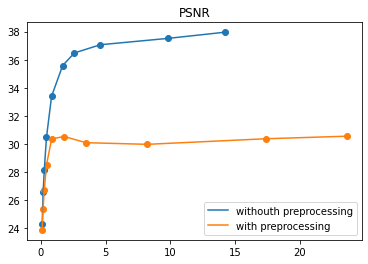

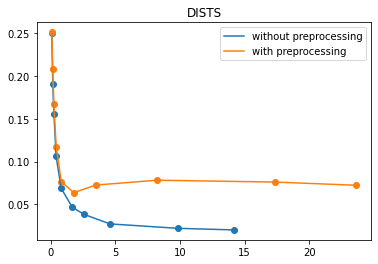

In [20]:
plt.figure()
plt.title("PSNR")
plt.plot(Log_3_with[0]['bitrate'], Log_3_with[0]['PSNR'], label = "withouth preprocessing")
plt.scatter(Log_3_with[0]['bitrate'], Log_3_with[0]['PSNR'])
plt.plot(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'], label = "with preprocessing")
plt.scatter(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'])
plt.legend()
plt.figure()
plt.title("DISTS")
plt.plot(Log_3_with[0]['bitrate'], Log_3_with[0]['DISTS1'], label = "without preprocessing")
plt.scatter(Log_3_with[0]['bitrate'], Log_3_with[0]['DISTS1'])
plt.plot(Log_3_without[0]['bitrate'], Log_3_without[0]['DISTS1'], label = "with preprocessing")
plt.scatter(Log_3_without[0]['bitrate'], Log_3_without[0]['DISTS1'])
plt.legend()

In [8]:
Log_3# With preprocessing

[{'mse': [0.003761526,
   0.0022537024,
   0.0015512533,
   0.00091297226,
   0.00046287983,
   0.0002791155,
   0.00022671149,
   0.00019999941,
   0.00018672063,
   0.00017199243],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.4675333,
   1.4870713,
   1.0303035,
   0.6152613,
   0.32258868,
   0.20309597,
   0.16902025,
   0.15165071,
   0.14301617,
   0.13343918],
  'PSNR': [24.301882,
   26.550669,
   28.171638,
   30.460445,
   33.400444,
   35.58738,
   36.4852,
   37.067566,
   37.52347,
   37.957916],
  'DISTS1': [0.24984428,
   0.19108722,
   0.15613475,
   0.106379926,
   0.06855124,
   0.046516858,
   0.038198758,
   0.027051479,
   0.021883175,
   0.020024614],
  'loss': [499.69232,
   382.1767,
   312.27106,
   212.76077,
   137.10294,
   93.034,
   76.39774,
   54.103157,
   43.766537,
   40.0494],
  'bitrate': [0.100881,
   

In [6]:
#NR
for Identity_flag in [ True, False]:
    a0= model_dirs_full, model_dirs_full, model_names = get_met_names(key= lambda x: "2000mse" in x and 
                                                                         "cheng2020_attn_quality2" in x and 
                                                                         'quality5' not in x and (('fixed_direction' in x) or 
                                                                                                  "MDTVSFA_2000m" in x))
    
    a0 = [a0[0][1:], a0[1][1:], a0[2][1:]]
    a1 = get_met_names(key= lambda x: "model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_direction.ckpt" in x)
    a2 = get_met_names(directory='./models_enhancement/0403/', key= lambda x: "" in x)
    model_dirs_full, model_target_met_names, model_names = [a0[0] + a1[0] + a2[0], a0[1] + a1[1] + a2[1],a0[2] +  a1[2] + a2[2]]
    model_dirs_full, model_target_met_names, model_names = model_dirs_full, model_target_met_names, model_names
    net_enhances = load_models(model_dirs_full)
    
    device_met = "cuda:0"
    device_enh = "cuda:0"
    device_sub = "cpu"
    num_frames = 64
    
    batch_sz = 2
    Log_1 = []
    model_target_met_names = [i if i != "PAC2PIC" else "PAC2PIQ" for i in model_target_met_names]
    if Identity_flag:
        model_target_met_names = np.unique(model_target_met_names)
    wandb.init(project="Whitebox_strong_metrics_attacks", entity="havent_invented", name="RD_curves_all_met_18_03" + ("Without Preprocessing" if Identity_flag else "With Preprocessing"),
               tags = {"RD curves", ("Without Preprocessing" if Identity_flag else "With Preprocessing")}, save_code = True)  
    wandb.config.update({"codecs": codecs_all, 
                         "Target Metrics": model_target_met_names,
                         "full_model_dirs" : model_dirs_full, "num_frames" : num_frames, "No preprocessing" : Identity_flag})
    for idxf, file in tqdm(enumerate(os.listdir(dst_dir))):
        Log_2 = []
        for model,met_name,fil_name_1 in tqdm(zip(net_enhances, model_target_met_names, model_dirs_full)):
            if met_name == "VSFA":
                batch_sz = 2
            else:
                batch_sz = 1#2
            if met_name == "Linearity":
                deivce_main = "cuda:0"
            else:
                deivce_main = "cuda:0"
            torch.cuda.empty_cache()
            with torch.no_grad():
                try:
                    f_name = met_name + " " +  file + (" without" if Identity_flag else " with") + " preprocessing" 
                    print(met_name, fil_name_1)
                    try:
                        del loss_calc
                    except Exception:
                        pass
                    loss_calc = Custom_enh_Loss(target_lst=['mse', met_name], to_train = False, crop_NIMA = False)
                    loss_calc = loss_calc.to('cpu')
                    ful_name = dst_dir + file
                    home_dir = "R:/home_dir/"
                    #dataset_test = Video_reader_dataset(name1 = ful_name, num_frames= 64, minimal_batch_sz = 2)#
                    #dataset_test = DataLoader(dataset_test, batch_size= batch_sz, shuffle = False)
                    Log_3 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],codecs = codecs_all,
                                        vid_full_dir = ful_name, to_crop = False, loss_f = loss_calc)
                    table = wandb.Table(columns= list(Log_3[0].keys()), data = [list(Log_3[0].values())])
                    wandb.log({f_name: table}) 
                    print(Log_3)
                    Log_2.append(Log_3)
                except Exception as exc:
                    raise
                    wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)
                    print("Exception in " + met_name)
                    
        Log_1.append(Log_2)
        np.save("./Logs_rd_curves/FR_2_metrics" + ("_Identity" if Identity_flag else "") + ".npy", Log_1)
        
    wandb.finish()
    print(Log_1)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: havent_invented (use `wandb login --relogin` to force relogin)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'Linearity': [0.45339638, 0.40311885, 0.32244512, 0.1467707, -0.023824617, -0.14573695, -0.17144683, -0.16694605, -0.15692464, -0.15566349], 'loss': [906.7965, 806.2399, 644.89185, 293.5423, -47.648773, -291.47363, -342.89343, -333.8919, -313.8491, -311.32678], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_c

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'MDTVSFA': [-0.44870508, -0.47278503, -0.485685, -0.50394565, -0.515102, -0.5236566, -0.526125, -0.52738714, -0.5274074, -0.52813506], 'loss': [-897.4064, -945.56775, -971.36847, -1007.8904, -1030.2035, -1047.3129, -1052.2498, -1054.774, -1054.8146, -1056.2699], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_che

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'PAC2PIQ': [-0.49286443, -0.56116676, -0.6120634, -0.66599584, -0.705251, -0.71799374, -0.7174728, -0.7135598, -0.7102464, -0.70892775], 'loss': [-985.7252, -1122.3313, -1224.1251, -1331.9907, -1410.5015, -1435.9872, -1434.9453, -1427.1194, -1420.4926, -1417.8553], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_che

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'SPAQ': [-0.40260553, -0.3983474, -0.3903737, -0.4162528, -0.4233754, -0.43182716, -0.430534, -0.44013584, -0.43401402, -0.43656975], 'loss': [-805.2074, -796.6926, -780.74585, -832.5047, -846.7503, -863.654, -861.06775, -880.2716, -868.02795, -873.1393], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_codec

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0037615257, 0.0022537024, 0.0015512533, 0.00091297226, 0.0004628798, 0.00027911557, 0.00022671153, 0.00019999946, 0.00018672064, 0.00017199246], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [2.4567327, 1.4762707, 1.019503, 0.6044607, 0.31178814, 0.19229542, 0.15821971, 0.14085019, 0.13221565, 0.12263864], 'PSNR': [24.29602, 26.533306, 28.159622, 30.45428, 33.39445, 35.58181, 36.478874, 37.05613, 37.50896, 37.943176], 'VSFA': [-0.39656407, -0.44951862, -0.47302955, -0.5023433, -0.521147, -0.524607, -0.5242802, -0.5270975, -0.5318683, -0.5310252], 'loss': [-793.1244, -899.0349, -946.0576, -1004.68567, -1042.2935, -1049.2136, -1048.5602, -1054.1948, -1063.7363, -1062.0502], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009055864, 0.009522308, 0.006550546, 0.0033723135, 0.0016641861, 0.0008440167, 0.00056005386, 0.0003145428, 0.00014449364, 9.518399e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.910177, 6.213482, 4.2810936, 2.214448, 1.1037381, 0.5704229, 0.38577613, 0.22613257, 0.11555809, 0.083494484], 'PSNR': [21.15073, 21.642025, 23.236916, 25.931522, 28.733086, 31.670204, 33.45553, 35.894585, 39.211292, 40.91382], 'Linearity': [0.5999513, 0.58077073, 0.59742856, 0.65794307, 0.6376282, 0.6356796, 0.6153793, 0.582088, 0.5385506, 0.5245554], 'loss': [1199.9117, 1161.551, 1194.8636, 1315.8895, 1275.258, 1271.3601, 1230.759, 1164.1763, 1077.1014, 1049.1108], 'bitrate': [0.36045, 0.4558, 0.541818, 0.807175, 1.478921, 2.902803, 4.289943, 6.964081, 12.399531, 16.302234]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_cheng2020_attn_quality2_fixed

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009055864, 0.009522308, 0.006550546, 0.0033723135, 0.0016641861, 0.0008440167, 0.00056005386, 0.0003145428, 0.00014449364, 9.518399e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.910177, 6.213482, 4.2810936, 2.214448, 1.1037381, 0.5704229, 0.38577613, 0.22613257, 0.11555809, 0.083494484], 'PSNR': [21.15073, 21.642025, 23.236916, 25.931522, 28.733086, 31.670204, 33.45553, 35.894585, 39.211292, 40.91382], 'MDTVSFA': [-0.4284063, -0.43382156, -0.43759727, -0.448617, -0.4583375, -0.47088116, -0.47912723, -0.48619443, -0.49035576, -0.49208754], 'loss': [-856.8036, -867.6336, -875.188, -897.2306, -916.67334, -941.7615, -958.2539, -972.3886, -980.7113, -984.1749], 'bitrate': [0.36045, 0.4558, 0.541818, 0.807175, 1.478921, 2.902803, 4.289943, 6.964081, 12.399531, 16.302234]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng2020_attn_qu

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009055864, 0.009522308, 0.006550546, 0.0033723135, 0.0016641861, 0.0008440167, 0.00056005386, 0.0003145428, 0.00014449364, 9.518399e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.910177, 6.213482, 4.2810936, 2.214448, 1.1037381, 0.5704229, 0.38577613, 0.22613257, 0.11555809, 0.083494484], 'PSNR': [21.15073, 21.642025, 23.236916, 25.931522, 28.733086, 31.670204, 33.45553, 35.894585, 39.211292, 40.91382], 'PAC2PIQ': [-0.48304832, -0.49014434, -0.4825136, -0.4943171, -0.51195765, -0.51767445, -0.5218528, -0.5207444, -0.5259688, -0.5283203], 'loss': [-966.0875, -980.2792, -965.0206, -988.63086, -1023.9136, -1035.3479, -1043.7051, -1041.4885, -1051.9375, -1056.6406], 'bitrate': [0.36045, 0.4558, 0.541818, 0.807175, 1.478921, 2.902803, 4.289943, 6.964081, 12.399531, 16.302234]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng2020_attn_

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009055864, 0.009522308, 0.006550546, 0.0033723135, 0.0016641861, 0.0008440167, 0.00056005386, 0.0003145428, 0.00014449364, 9.518399e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.910177, 6.213482, 4.2810936, 2.214448, 1.1037381, 0.5704229, 0.38577613, 0.22613257, 0.11555809, 0.083494484], 'PSNR': [21.15073, 21.642025, 23.236916, 25.931522, 28.733086, 31.670204, 33.45553, 35.894585, 39.211292, 40.91382], 'SPAQ': [-0.4284922, -0.42869535, -0.4273184, -0.43347928, -0.4263403, -0.4270627, -0.4283405, -0.42989933, -0.43684077, -0.44312888], 'loss': [-856.9753, -857.3812, -854.6303, -866.9552, -852.67896, -854.1245, -856.6804, -859.79834, -873.6814, -886.2577], 'bitrate': [0.36045, 0.4558, 0.541818, 0.807175, 1.478921, 2.902803, 4.289943, 6.964081, 12.399531, 16.302234]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_di

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009055864, 0.009522308, 0.006550546, 0.0033723135, 0.0016641862, 0.0008440167, 0.0005600539, 0.00031454285, 0.00014449365, 9.5184005e-05], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [5.8993764, 6.202681, 4.2702928, 2.2036474, 1.0929377, 0.55962235, 0.37497556, 0.21533203, 0.10475753, 0.072693944], 'PSNR': [21.019142, 21.52348, 23.109478, 25.773453, 28.61635, 31.54165, 33.324055, 35.77789, 39.114628, 40.83141], 'VSFA': [-0.34987092, -0.35987452, -0.36722505, -0.3916478, -0.41666755, -0.43308422, -0.44364524, -0.45436332, -0.45538568, -0.45634368], 'loss': [-699.7328, -719.7395, -734.4436, -783.29224, -833.3335, -866.1676, -887.2899, -908.7263, -910.77124, -912.68726], 'bitrate': [0.36045, 0.4558, 0.541818, 0.807175, 1.478921, 2.902803, 4.289943, 6.964081, 12.399531, 16.302234]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009697751, 0.0044392752, 0.0026605064, 0.0012684765, 0.0005004005, 0.00025291523, 0.00018650865, 0.00013854218, 0.0001028321, 8.907321e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [6.3275633, 2.9082398, 1.7515953, 0.8464279, 0.34698653, 0.1860592, 0.14287835, 0.111688145, 0.08846767, 0.07952095], 'PSNR': [21.147215, 24.69606, 26.925434, 29.9851, 33.789215, 36.58705, 37.843365, 39.079475, 40.299873, 40.870567], 'Linearity': [0.68347657, 0.71009433, 0.7066006, 0.6560316, 0.4495265, 0.28122783, 0.1916048, 0.13135046, 0.09388733, 0.08124267], 'loss': [1366.9629, 1420.1931, 1413.2039, 1312.0645, 899.05347, 562.45593, 383.20978, 262.70105, 187.77475, 162.48544], 'bitrate': [0.168175, 0.259668, 0.357481, 0.577243, 1.092981, 2.132078, 3.214578, 5.567656, 10.55694, 14.354068]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_cheng2020_attn

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009697751, 0.0044392752, 0.0026605064, 0.0012684765, 0.0005004005, 0.00025291523, 0.00018650865, 0.00013854218, 0.0001028321, 8.907321e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [6.3275633, 2.9082398, 1.7515953, 0.8464279, 0.34698653, 0.1860592, 0.14287835, 0.111688145, 0.08846767, 0.07952095], 'PSNR': [21.147215, 24.69606, 26.925434, 29.9851, 33.789215, 36.58705, 37.843365, 39.079475, 40.299873, 40.870567], 'MDTVSFA': [-0.41068512, -0.41418988, -0.42095876, -0.43923697, -0.4642939, -0.47960088, -0.48625624, -0.4928794, -0.4972586, -0.49857825], 'loss': [-821.36053, -828.3753, -841.9148, -878.47266, -928.5873, -959.2014, -972.5123, -985.75867, -994.5171, -997.1565], 'bitrate': [0.168175, 0.259668, 0.357481, 0.577243, 1.092981, 2.132078, 3.214578, 5.567656, 10.55694, 14.354068]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009697751, 0.0044392752, 0.0026605064, 0.0012684765, 0.0005004005, 0.00025291523, 0.00018650865, 0.00013854218, 0.0001028321, 8.907321e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [6.3275633, 2.9082398, 1.7515953, 0.8464279, 0.34698653, 0.1860592, 0.14287835, 0.111688145, 0.08846767, 0.07952095], 'PSNR': [21.147215, 24.69606, 26.925434, 29.9851, 33.789215, 36.58705, 37.843365, 39.079475, 40.299873, 40.870567], 'PAC2PIQ': [-0.41652012, -0.40850842, -0.420941, -0.44921017, -0.53274846, -0.5847552, -0.5979841, -0.60481876, -0.60590726, -0.6073003], 'loss': [-833.0305, -817.0124, -841.8794, -898.41907, -1065.4963, -1169.51, -1195.968, -1209.6375, -1211.8145, -1214.6005], 'bitrate': [0.168175, 0.259668, 0.357481, 0.577243, 1.092981, 2.132078, 3.214578, 5.567656, 10.55694, 14.354068]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng2020

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.009697751, 0.0044392752, 0.0026605064, 0.0012684765, 0.0005004005, 0.00025291523, 0.00018650865, 0.00013854218, 0.0001028321, 8.907321e-05], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [6.3275633, 2.9082398, 1.7515953, 0.8464279, 0.34698653, 0.1860592, 0.14287835, 0.111688145, 0.08846767, 0.07952095], 'PSNR': [21.147215, 24.69606, 26.925434, 29.9851, 33.789215, 36.58705, 37.843365, 39.079475, 40.299873, 40.870567], 'SPAQ': [-0.37769896, -0.38297957, -0.39209813, -0.38907236, -0.3963074, -0.39281058, -0.395649, -0.40276197, -0.40690434, -0.41093087], 'loss': [-755.38824, -765.9547, -784.1935, -778.1435, -792.61426, -785.6209, -791.2978, -805.5238, -813.8086, -821.8617], 'bitrate': [0.168175, 0.259668, 0.357481, 0.577243, 1.092981, 2.132078, 3.214578, 5.567656, 10.55694, 14.354068]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_code

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.00969775, 0.0044392752, 0.0026605062, 0.0012684765, 0.0005004005, 0.00025291526, 0.00018650867, 0.00013854218, 0.00010283211, 8.907322e-05], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [6.316763, 2.8974392, 1.7407948, 0.83562744, 0.33618596, 0.17525867, 0.13207781, 0.10088761, 0.07766713, 0.068720415], 'PSNR': [21.121286, 24.651741, 26.89787, 29.975628, 33.783333, 36.580708, 37.83522, 39.070206, 40.28988, 40.86033], 'VSFA': [-0.30357987, -0.31508327, -0.32475537, -0.35602337, -0.3978043, -0.42448968, -0.4313721, -0.43725687, -0.44092435, -0.44290918], 'loss': [-607.15, -630.1622, -649.50806, -712.0454, -795.60803, -848.9791, -862.744, -874.51355, -881.8486, -885.81824], 'bitrate': [0.168175, 0.259668, 0.357481, 0.577243, 1.092981, 2.132078, 3.214578, 5.567656, 10.55694, 14.354068]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0061228117, 0.003768739, 0.0026707775, 0.0017585937, 0.0010992258, 0.00081361446, 0.00077158597, 0.00079569663, 0.00078186346, 0.000726372], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [4.0029593, 2.4722238, 1.7582741, 1.1651266, 0.7363727, 0.55065393, 0.5233249, 0.5390028, 0.5300078, 0.49392444], 'PSNR': [22.14769, 24.257526, 25.750793, 27.56771, 29.602913, 30.908854, 31.148333, 31.083963, 31.490799, 32.038933], 'Linearity': [0.5891681, 0.44697732, 0.30738235, 0.16190085, -0.07516727, -0.17037198, -0.1586071, -0.1204916, -0.096819766, -0.100879684], 'loss': [1178.3423, 893.95844, 614.7674, 323.80344, -150.33344, -340.7431, -317.2134, -240.98242, -193.63876, -201.75862], 'bitrate': [0.086193, 0.155775, 0.234231, 0.379356, 0.725796, 1.517862, 2.544165, 5.633406, 17.86754, 26.572437]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_chen

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0061228117, 0.003768739, 0.0026707775, 0.0017585937, 0.0010992258, 0.00081361446, 0.00077158597, 0.00079569663, 0.00078186346, 0.000726372], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [4.0029593, 2.4722238, 1.7582741, 1.1651266, 0.7363727, 0.55065393, 0.5233249, 0.5390028, 0.5300078, 0.49392444], 'PSNR': [22.14769, 24.257526, 25.750793, 27.56771, 29.602913, 30.908854, 31.148333, 31.083963, 31.490799, 32.038933], 'MDTVSFA': [-0.4322284, -0.4492349, -0.4641884, -0.48791784, -0.4991198, -0.50711465, -0.5060391, -0.504096, -0.50464, -0.5059055], 'loss': [-864.4507, -898.46594, -928.37415, -975.83386, -998.23846, -1014.2285, -1012.0774, -1008.19116, -1009.2792, -1011.81036], 'bitrate': [0.086193, 0.155775, 0.234231, 0.379356, 0.725796, 1.517862, 2.544165, 5.633406, 17.86754, 26.572437]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng20

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0061228117, 0.003768739, 0.0026707775, 0.0017585937, 0.0010992258, 0.00081361446, 0.00077158597, 0.00079569663, 0.00078186346, 0.000726372], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [4.0029593, 2.4722238, 1.7582741, 1.1651266, 0.7363727, 0.55065393, 0.5233249, 0.5390028, 0.5300078, 0.49392444], 'PSNR': [22.14769, 24.257526, 25.750793, 27.56771, 29.602913, 30.908854, 31.148333, 31.083963, 31.490799, 32.038933], 'PAC2PIQ': [-0.43191296, -0.53795516, -0.56403875, -0.62884486, -0.6774632, -0.6970866, -0.6970341, -0.6930435, -0.6896969, -0.69011426], 'loss': [-863.8198, -1075.9066, -1128.075, -1257.688, -1354.9253, -1394.1725, -1394.0674, -1386.0862, -1379.393, -1380.2278], 'bitrate': [0.086193, 0.155775, 0.234231, 0.379356, 0.725796, 1.517862, 2.544165, 5.633406, 17.86754, 26.572437]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng2020

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0061228117, 0.003768739, 0.0026707775, 0.0017585937, 0.0010992258, 0.00081361446, 0.00077158597, 0.00079569663, 0.00078186346, 0.000726372], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [4.0029593, 2.4722238, 1.7582741, 1.1651266, 0.7363727, 0.55065393, 0.5233249, 0.5390028, 0.5300078, 0.49392444], 'PSNR': [22.14769, 24.257526, 25.750793, 27.56771, 29.602913, 30.908854, 31.148333, 31.083963, 31.490799, 32.038933], 'SPAQ': [-0.38036805, -0.36127, -0.38245833, -0.40683985, -0.4354661, -0.46324825, -0.47749132, -0.45869115, -0.45475662, -0.45927206], 'loss': [-760.73004, -722.53613, -764.914, -813.67786, -870.93115, -926.49567, -954.9818, -917.38153, -909.51245, -918.54333], 'bitrate': [0.086193, 0.155775, 0.234231, 0.379356, 0.725796, 1.517862, 2.544165, 5.633406, 17.86754, 26.572437]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_co

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.0061228117, 0.003768739, 0.0026707773, 0.0017585937, 0.001099226, 0.00081361446, 0.000771586, 0.00079569663, 0.00078186346, 0.000726372], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [3.992159, 2.4614232, 1.7474735, 1.1543262, 0.72557217, 0.53985333, 0.51252437, 0.5282023, 0.51920724, 0.48312393], 'PSNR': [22.147667, 24.25712, 25.74961, 27.565596, 29.602154, 30.9076, 31.143654, 31.063208, 31.431065, 31.968422], 'VSFA': [-0.3599528, -0.41196918, -0.44700703, -0.46896645, -0.47510675, -0.47656798, -0.48990783, -0.50255454, -0.5060971, -0.5085182], 'loss': [-719.8995, -823.9347, -894.0114, -937.93115, -950.2124, -953.13525, -979.81494, -1005.1083, -1012.19336, -1017.03564], 'bitrate': [0.086193, 0.155775, 0.234231, 0.379356, 0.725796, 1.517862, 2.544165, 5.633406, 17.86754, 26.572437]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.020693384, 0.018159524, 0.015214412, 0.013211088, 0.010613736, 0.008247007, 0.006902557, 0.005392775, 0.004349213, 0.0037461247], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [13.477474, 11.82983, 9.914772, 8.61211, 6.9231825, 5.3842173, 4.5099883, 3.5282528, 2.849677, 2.4575186], 'PSNR': [17.062183, 17.766478, 18.559017, 19.281322, 20.44449, 21.855583, 22.81675, 24.136555, 25.559223, 26.46083], 'Linearity': [0.4890495, 0.41431278, 0.3319851, 0.19366069, 0.037980445, -0.09809506, -0.17572114, -0.24034183, -0.27862918, -0.3065727], 'loss': [978.1196, 828.6437, 663.98535, 387.3346, 75.97151, -196.18188, -351.43536, -480.67828, -557.254, -613.1417], 'bitrate': [0.147662, 0.22204, 0.35574, 0.581393, 1.206106, 2.666137, 4.244687, 7.755468, 17.186143, 25.113956]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_cheng2020_attn_quality2_fixed_d

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.020693384, 0.018159524, 0.015214412, 0.013211088, 0.010613736, 0.008247007, 0.006902557, 0.005392775, 0.004349213, 0.0037461247], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [13.477474, 11.82983, 9.914772, 8.61211, 6.9231825, 5.3842173, 4.5099883, 3.5282528, 2.849677, 2.4575186], 'PSNR': [17.062183, 17.766478, 18.559017, 19.281322, 20.44449, 21.855583, 22.81675, 24.136555, 25.559223, 26.46083], 'MDTVSFA': [-0.4019582, -0.40940565, -0.4221295, -0.44224304, -0.4581282, -0.4711151, -0.47677514, -0.48368144, -0.49005097, -0.4917682], 'loss': [-803.8957, -818.7931, -844.2438, -884.4729, -916.24585, -942.2219, -953.5434, -967.3575, -980.09753, -983.5327], 'bitrate': [0.147662, 0.22204, 0.35574, 0.581393, 1.206106, 2.666137, 4.244687, 7.755468, 17.186143, 25.113956]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng2020_attn_quality2_fixed_

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.020693384, 0.018159524, 0.015214412, 0.013211088, 0.010613736, 0.008247007, 0.006902557, 0.005392775, 0.004349213, 0.0037461247], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [13.477474, 11.82983, 9.914772, 8.61211, 6.9231825, 5.3842173, 4.5099883, 3.5282528, 2.849677, 2.4575186], 'PSNR': [17.062183, 17.766478, 18.559017, 19.281322, 20.44449, 21.855583, 22.81675, 24.136555, 25.559223, 26.46083], 'PAC2PIQ': [-0.5151863, -0.5426568, -0.58185184, -0.62630665, -0.6686666, -0.68923926, -0.69916004, -0.7081844, -0.71359766, -0.71318686], 'loss': [-1030.3519, -1085.2954, -1163.6885, -1252.6002, -1337.3225, -1378.4703, -1398.3131, -1416.3635, -1427.1909, -1426.37], 'bitrate': [0.147662, 0.22204, 0.35574, 0.581393, 1.206106, 2.666137, 4.244687, 7.755468, 17.186143, 25.113956]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng2020_attn_quality2_fi

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.020693384, 0.018159524, 0.015214412, 0.013211088, 0.010613736, 0.008247007, 0.006902557, 0.005392775, 0.004349213, 0.0037461247], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [13.477474, 11.82983, 9.914772, 8.61211, 6.9231825, 5.3842173, 4.5099883, 3.5282528, 2.849677, 2.4575186], 'PSNR': [17.062183, 17.766478, 18.559017, 19.281322, 20.44449, 21.855583, 22.81675, 24.136555, 25.559223, 26.46083], 'SPAQ': [-0.38520128, -0.3902952, -0.41389146, -0.43328616, -0.46349967, -0.48176867, -0.49104023, -0.48936892, -0.49094498, -0.49420244], 'loss': [-770.38184, -780.57227, -827.7677, -866.55914, -926.9888, -963.5291, -982.07355, -978.73254, -981.8856, -988.4011], 'bitrate': [0.147662, 0.22204, 0.35574, 0.581393, 1.206106, 2.666137, 4.244687, 7.755468, 17.186143, 25.113956]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_direction

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.020693384, 0.01815952, 0.015214412, 0.013211087, 0.010613736, 0.008247007, 0.006902556, 0.0053927745, 0.004349213, 0.0037461245], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [13.466674, 11.819029, 9.903971, 8.60131, 6.912382, 5.373416, 4.4991875, 3.517452, 2.8388765, 2.446718], 'PSNR': [17.047688, 17.756989, 18.549591, 19.268478, 20.436716, 21.846117, 22.80399, 24.115679, 25.522152, 26.417107], 'VSFA': [-0.28336877, -0.29722, -0.3251797, -0.36086825, -0.38530666, -0.40523818, -0.41448426, -0.42893362, -0.4463351, -0.4507434], 'loss': [-566.71686, -594.4218, -650.3441, -721.72327, -770.60266, -810.46814, -828.9617, -857.8619, -892.6659, -901.4831], 'bitrate': [0.147662, 0.22204, 0.35574, 0.581393, 1.206106, 2.666137, 4.244687, 7.755468, 17.186143, 25.113956]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.008005714, 0.005836477, 0.0039045233, 0.0019088578, 0.0007811298, 0.00040171767, 0.00029834209, 0.00023825995, 0.00023391756, 0.00021466777], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.227317, 3.8167703, 2.5605175, 1.262836, 0.52953076, 0.28281802, 0.21559805, 0.17652963, 0.173706, 0.16118883], 'PSNR': [21.251162, 22.939987, 24.671581, 27.543129, 31.24834, 34.062748, 35.331566, 36.318596, 36.622314, 37.11691], 'Linearity': [0.59792405, 0.62551427, 0.6256534, 0.6481457, 0.6061462, 0.5011029, 0.47024065, 0.4446655, 0.4467812, 0.44455856], 'loss': [1195.8562, 1251.0342, 1251.3108, 1296.2932, 1212.2932, 1002.2063, 940.48157, 889.3313, 893.5626, 889.1173], 'bitrate': [0.155771, 0.221365, 0.322596, 0.534575, 0.992612, 1.922656, 2.861131, 4.826075, 10.659053, 15.588253]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_cheng2020_attn_qual

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.008005714, 0.005836477, 0.0039045233, 0.0019088578, 0.0007811298, 0.00040171767, 0.00029834209, 0.00023825995, 0.00023391756, 0.00021466777], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.227317, 3.8167703, 2.5605175, 1.262836, 0.52953076, 0.28281802, 0.21559805, 0.17652963, 0.173706, 0.16118883], 'PSNR': [21.251162, 22.939987, 24.671581, 27.543129, 31.24834, 34.062748, 35.331566, 36.318596, 36.622314, 37.11691], 'MDTVSFA': [-0.4124459, -0.41377228, -0.41822815, -0.42965966, -0.45880434, -0.47905552, -0.4837638, -0.48940247, -0.49008083, -0.4916153], 'loss': [-824.8838, -827.5387, -836.4524, -859.3174, -917.6079, -958.11066, -967.52734, -978.8047, -980.16144, -983.2304], 'bitrate': [0.155771, 0.221365, 0.322596, 0.534575, 0.992612, 1.922656, 2.861131, 4.826075, 10.659053, 15.588253]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.008005714, 0.005836477, 0.0039045233, 0.0019088578, 0.0007811298, 0.00040171767, 0.00029834209, 0.00023825995, 0.00023391756, 0.00021466777], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.227317, 3.8167703, 2.5605175, 1.262836, 0.52953076, 0.28281802, 0.21559805, 0.17652963, 0.173706, 0.16118883], 'PSNR': [21.251162, 22.939987, 24.671581, 27.543129, 31.24834, 34.062748, 35.331566, 36.318596, 36.622314, 37.11691], 'PAC2PIQ': [-0.4433301, -0.45866203, -0.46080035, -0.4676703, -0.490372, -0.47004172, -0.45669153, -0.44529077, -0.44559032, -0.4444984], 'loss': [-886.65216, -917.31824, -921.5968, -935.33875, -980.7433, -940.083, -913.38275, -890.5813, -891.1804, -888.9966], 'bitrate': [0.155771, 0.221365, 0.322596, 0.534575, 0.992612, 1.922656, 2.861131, 4.826075, 10.659053, 15.588253]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng2020_

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.008005714, 0.005836477, 0.0039045233, 0.0019088578, 0.0007811298, 0.00040171767, 0.00029834209, 0.00023825995, 0.00023391756, 0.00021466777], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.227317, 3.8167703, 2.5605175, 1.262836, 0.52953076, 0.28281802, 0.21559805, 0.17652963, 0.173706, 0.16118883], 'PSNR': [21.251162, 22.939987, 24.671581, 27.543129, 31.24834, 34.062748, 35.331566, 36.318596, 36.622314, 37.11691], 'SPAQ': [-0.37175727, -0.37535515, -0.3848579, -0.40041706, -0.40631157, -0.40971354, -0.41467756, -0.42219055, -0.43179822, -0.4309017], 'loss': [-743.5066, -750.70447, -769.712, -800.8323, -812.6223, -819.4267, -829.35486, -844.3809, -863.5962, -861.80316], 'bitrate': [0.155771, 0.221365, 0.322596, 0.534575, 0.992612, 1.922656, 2.861131, 4.826075, 10.659053, 15.588253]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_cod

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.008005714, 0.0058364766, 0.0039045233, 0.0019088578, 0.0007811298, 0.00040171767, 0.00029834214, 0.00023825998, 0.00023391758, 0.00021466779], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [5.216516, 3.8059697, 2.549717, 1.2520354, 0.51873016, 0.27201748, 0.2047975, 0.16572909, 0.16290545, 0.15038827], 'PSNR': [21.152294, 22.840452, 24.598589, 27.532173, 31.24459, 34.059788, 35.32897, 36.314137, 36.610542, 37.10257], 'VSFA': [-0.32599804, -0.33668366, -0.3570915, -0.3783576, -0.41293895, -0.4287504, -0.4315833, -0.4374429, -0.4386651, -0.4402268], 'loss': [-651.98804, -673.3615, -714.1791, -756.71326, -825.8771, -857.50037, -863.1664, -874.8855, -877.32996, -880.45337], 'bitrate': [0.155771, 0.221365, 0.322596, 0.534575, 0.992612, 1.922656, 2.861131, 4.826075, 10.659053, 15.588253]}]


0it [00:00, ?it/s]

Linearity ./models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_cheng2020_attn_quality2.ckpt


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.004442066, 0.0031226422, 0.002264556, 0.0011454237, 0.0005163242, 0.0002973791, 0.00024417537, 0.00022025252, 0.00021866336, 0.0002121516], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9100544, 2.0520992, 1.4941287, 0.76641285, 0.35734087, 0.21497184, 0.18037614, 0.16482031, 0.16378695, 0.15955266], 'PSNR': [23.573553, 25.153934, 26.628002, 29.551586, 32.916775, 35.291523, 36.1472, 36.61695, 36.79435, 37.054665], 'Linearity': [0.6248872, 0.59732383, 0.52018815, 0.40713108, 0.31191772, 0.25646725, 0.24318767, 0.25791168, 0.2664888, 0.27054268], 'loss': [1249.7788, 1194.6509, 1040.3787, 814.2633, 623.83594, 512.9348, 486.3756, 515.8236, 532.97784, 541.0856], 'bitrate': [0.091509, 0.172956, 0.272343, 0.4618, 0.832178, 1.572128, 2.4494, 4.411953, 9.494778, 14.538178]}]
MDTVSFA ./models_enhancement/model_vimeo11k_PAC2PIC_2000mse_enhance_cheng2020_attn_qualit

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.004442066, 0.0031226422, 0.002264556, 0.0011454237, 0.0005163242, 0.0002973791, 0.00024417537, 0.00022025252, 0.00021866336, 0.0002121516], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9100544, 2.0520992, 1.4941287, 0.76641285, 0.35734087, 0.21497184, 0.18037614, 0.16482031, 0.16378695, 0.15955266], 'PSNR': [23.573553, 25.153934, 26.628002, 29.551586, 32.916775, 35.291523, 36.1472, 36.61695, 36.79435, 37.054665], 'MDTVSFA': [-0.41667187, -0.43087503, -0.4498806, -0.4727012, -0.49057022, -0.5045395, -0.5089867, -0.51231205, -0.51345927, -0.51483667], 'loss': [-833.33923, -861.747, -899.7589, -945.40125, -981.1399, -1009.07874, -1017.97314, -1024.6238, -1026.9183, -1029.6731], 'bitrate': [0.091509, 0.172956, 0.272343, 0.4618, 0.832178, 1.572128, 2.4494, 4.411953, 9.494778, 14.538178]}]
PAC2PIQ ./models_enhancement/model_vimeo11k_SPAQ_2000mse_enhance_cheng

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.004442066, 0.0031226422, 0.002264556, 0.0011454237, 0.0005163242, 0.0002973791, 0.00024417537, 0.00022025252, 0.00021866336, 0.0002121516], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9100544, 2.0520992, 1.4941287, 0.76641285, 0.35734087, 0.21497184, 0.18037614, 0.16482031, 0.16378695, 0.15955266], 'PSNR': [23.573553, 25.153934, 26.628002, 29.551586, 32.916775, 35.291523, 36.1472, 36.61695, 36.79435, 37.054665], 'PAC2PIQ': [-0.45357454, -0.50613236, -0.5375508, -0.54988146, -0.56283355, -0.5731224, -0.5800121, -0.57736856, -0.57592607, -0.573233], 'loss': [-907.14465, -1012.2616, -1075.0994, -1099.7617, -1125.6666, -1146.2445, -1160.0239, -1154.7369, -1151.8518, -1146.4658], 'bitrate': [0.091509, 0.172956, 0.272343, 0.4618, 0.832178, 1.572128, 2.4494, 4.411953, 9.494778, 14.538178]}]
SPAQ ./models_enhancement/model_vimeo11k_VSFA_2000mse_enhance_cheng20

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.004442066, 0.0031226422, 0.002264556, 0.0011454237, 0.0005163242, 0.0002973791, 0.00024417537, 0.00022025252, 0.00021866336, 0.0002121516], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9100544, 2.0520992, 1.4941287, 0.76641285, 0.35734087, 0.21497184, 0.18037614, 0.16482031, 0.16378695, 0.15955266], 'PSNR': [23.573553, 25.153934, 26.628002, 29.551586, 32.916775, 35.291523, 36.1472, 36.61695, 36.79435, 37.054665], 'SPAQ': [-0.37128073, -0.4159994, -0.41377747, -0.4299674, -0.4371606, -0.4442852, -0.45095205, -0.45789915, -0.44950694, -0.44682664], 'loss': [-742.557, -831.9957, -827.5527, -859.9336, -874.3208, -888.57007, -901.9039, -915.7981, -899.0136, -893.6531], 'bitrate': [0.091509, 0.172956, 0.272343, 0.4618, 0.832178, 1.572128, 2.4494, 4.411953, 9.494778, 14.538178]}]
VSFA ./models_enhancement/model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse_loss': [0.004442066, 0.0031226424, 0.002264556, 0.0011454236, 0.00051632413, 0.0002973791, 0.0002441754, 0.00022025258, 0.0002186634, 0.00021215164], 'bpp_loss': [0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547, 0.010800547], 'loss_classic': [2.8992538, 2.0412989, 1.4833281, 0.75561225, 0.34654033, 0.2041713, 0.1695756, 0.15401977, 0.1529864, 0.14875215], 'PSNR': [23.570898, 25.139523, 26.608728, 29.535534, 32.912125, 35.289757, 36.144688, 36.60641, 36.75998, 37.01198], 'VSFA': [-0.3437705, -0.3682469, -0.37402463, -0.394907, -0.40786493, -0.4084797, -0.4092607, -0.4104792, -0.41297874, -0.41489294], 'loss': [-687.5366, -736.4907, -748.04694, -789.81287, -815.7293, -816.95905, -818.5211, -820.9581, -825.9573, -829.78564], 'bitrate': [0.091509, 0.172956, 0.272343, 0.4618, 0.832178, 1.572128, 2.4494, 4.411953, 9.494778, 14.538178]}]



[[[{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'Linearity': [0.45339638, 0.40311885, 0.32244512, 0.1467707, -0.023824617, -0.14573695, -0.17144683, -0.16694605, -0.15692464, -0.15566349], 'loss': [906.7965, 806.2399, 644.89185, 293.5423, -47.648773, -291.47363, -342.89343, -333.8919, -313.8491, -311.32678], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}], [{'mse_loss': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297

In [10]:
len(Log_1[0])

5

In [7]:
Log_1

[[[{'mse_loss': [0.003761526,
     0.0022537024,
     0.0015512533,
     0.00091297226,
     0.00046287983,
     0.0002791155,
     0.00022671149,
     0.00019999941,
     0.00018672063,
     0.00017199243],
    'bpp_loss': [0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094,
     0.021601094],
    'loss_classic': [2.4675333,
     1.4870713,
     1.0303035,
     0.6152613,
     0.32258868,
     0.20309597,
     0.16902025,
     0.15165071,
     0.14301617,
     0.13343918],
    'PSNR': [24.301882,
     26.550669,
     28.171638,
     30.460445,
     33.400444,
     35.58738,
     36.4852,
     37.067566,
     37.52347,
     37.957916],
    'Linearity': [0.45339638,
     0.40311885,
     0.32244512,
     0.1467707,
     -0.023824617,
     -0.14573695,
     -0.17144683,
     -0.16694605,
     -0.15692464,
     -0.15566349],
    'loss': [906.7965,
     806.2399,
     644.89185,
     29

In [7]:
np.save("./Logs_rd_curves/tmp_ALL_metrics_2000mse_fixed" + ("_Identity" if Identity_flag else "") + ".npy", Log_1)

In [6]:
wandb.finish()

In [29]:
np.array(list(Log_3[0].values())).shape

(7, 10)

In [25]:
table = wandb.Table(columns= list(Log_3[0].keys()), data = list([Log_3[0].values()]))
wandb.log({f_name: table}) 

In [9]:
 len(list(Log_3[0].keys())), len(list(Log_3[0].values()))

(7, 7)

In [6]:
"100k 3M"#wrong: Linearity, NIMA
# KONIQ do not force patchsz < 512x512
# NIMA do not force 224x224

list(zip(Lst2, -np.array([list(i[0].values())[4] for i in Log_1[0]])))

NameError: name 'Lst2' is not defined